In [1]:
#import cell
from __future__ import print_function
import threading
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.svm import LinearSVC
import numpy as np
from sklearn import linear_model
import pandas as pd
from genetic_selection import GeneticSelectionCV
from random import randint

In [18]:
#function to devide dataset into 4 half
def devide(X):
    no_feature=X.shape[1]
    quarter=int(no_feature/4)
    a=[]
    d=0
    for i in range(1,4):
        c=quarter*i
        b=X.iloc[:,d:c]
        d=c
        a.append(b)
    l=X.iloc[:,d:]
    a.append(l)
    return a
    

In [87]:
#function for feature selection
def gene_selector(X,y):
    estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")
    selector = GeneticSelectionCV(estimator,
                                 cv=5,
                                 verbose=1,
                                 scoring="accuracy",
                                 max_features=5,
                                 n_population=300,
                                 crossover_proba=0.5,
                                 mutation_proba=0.2,
                                 n_generations=100,
                                 crossover_independent_proba=0.5,
                                 mutation_independent_proba=0.05,
                                 tournament_size=3,
                                 n_gen_no_change=100,
                                 caching=True,
                                     n_jobs=-1)
    selector.fit(X, y)

    

    selected_genes=[]
    m=0
    for n in selector.support_:
        if n==True:
            selected_genes.append(m)
            m=m+1
            

        else:
            m=m+1
    return selected_genes

In [20]:
#prediction using linear SVM
def linearSVM(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = LinearSVC(random_state=0, tol=1e-5)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    return [pred,X_train, X_test, y_train, y_test]
    

In [35]:
#migration function
def migration(selected_feature_df1,df1,df2,selected_feature_df2):
    #selected_dataset=df1.iloc[:,selected_feature_df1]
    c=df2.drop(df2.columns[selected_feature_df2],axis=1)
    #print(c)
    #print(selected_feature_df1)
    #a=c.shape[1]
    #print(a)
    #print(df2)
    #l=len(selected_feature)
    b=[]
    for i in selected_feature_df1:
        #rand=[]
        shape=c.shape[1]
        ran=randint(0,shape-1)
        if df1.columns[i] not in df2.columns: 
            c.drop(c.columns[ran],axis=1,inplace=True)
            b.append(i)
        
        
    c=pd.concat([c,df1.iloc[:,b]],axis=1)   
    d=pd.concat([c,df2.iloc[:,selected_feature_df2]],axis=1)
    return d

In [22]:
def accuracy(y_pred,y_test):
    return accuracy_score(y_pred,y_test)

In [27]:
data_input=pd.read_csv('Autism Input')
data_output=pd.read_csv("Autism Output")['autism']
subset=devide(data_input)
df1=subset[0]
df2=subset[1]
df3=subset[2]
df4=subset[3]
number_of_loop=[]
acc1=[]
'''s1=threading.Thread(target=gene_selector,args=(df1,data_output))
s2=threading.Thread(target=gene_selector,args=(df2,data_output))
s3=threading.Thread(target=gene_selector,args=(df3,data_output))
s4=threading.Thread(target=gene_selector,args=(df4,data_output))'''
for i in range(9):
    print("loop executed ",i)
    '''s1.start()
    s2.start()
    s3.start()
    s4.start()
    s1.join()
    s2.join()
    s3.join()
    s4.join()'''
    s1=gene_selector(df1,data_output)
    s2=gene_selector(df2,data_output)
    s3=gene_selector(df3,data_output)
    s4=gene_selector(df4,data_output)
    
    df2f=migration(s1,df1,df2,s2)
    df3f=migration(s2,df2,df3,s3)
    df4f=migration(s3,df3,df4,s4)
    df1f=migration(s4,df4,df1,s1)
    
    df2=df2f.iloc[:,:]
    df3=df3f.iloc[:,:]
    df4=df4f.iloc[:,:]
    df1=df1f.iloc[:,:]
    
    migrated_data=pd.concat([df1.iloc[:,s1],df2.iloc[:,s2],df3.iloc[:,s3],df4.iloc[:,s4]],axis=1)
    a=linearSVM(migrated_data,data_output)
    b=accuracy(a[0],a[4])
    acc1.append(b)

    number_of_loop.append(i)

s1=gene_selector(df1,data_output)
s2=gene_selector(df2,data_output)
s3=gene_selector(df3,data_output)
s4=gene_selector(df4,data_output)
migrated_data=pd.concat([df1.iloc[:,s1],df2.iloc[:,s2],df3.iloc[:,s3],df4.iloc[:,s4]],axis=1)
a=linearSVM(migrated_data,data_output)
b=accuracy(a[0],a[4])
acc1.append(b)

loop executed  0
Selecting features with genetic algorithm.
gen	nevals	avg                  	std                      	min              	max              
0  	300   	[-10000.     6829.83]	[ 0.         57.22086828]	[-10000.   6685.]	[-10000.   7011.]
1  	181   	[-10000.           6784.28666667]	[ 0.         51.52861169]	[-10000.   6635.]	[-10000.   6942.]
2  	167   	[-10000.    6744.5]              	[ 0.         39.09923273]	[-10000.   6635.]	[-10000.   6867.]
3  	195   	[-10000.     6715.93]            	[ 0.         40.86226988]	[-10000.   6609.]	[-10000.   6848.]
4  	159   	[-10000.           6683.92333333]	[ 0.         42.28929087]	[-10000.   6561.]	[-10000.   6836.]
5  	176   	[-10000.           6654.63333333]	[ 0.         41.36615632]	[-10000.   6549.]	[-10000.   6788.]
6  	194   	[-10000.           6627.37333333]	[ 0.         43.13282534]	[-10000.   6505.]	[-10000.   6768.]
7  	185   	[-10000.     6596.26]            	[ 0.         42.75261084]	[-10000.   6435.]	[-10000.   6746.]
8

76 	201   	[-10000.     5133.19]            	[ 0.         79.72733053]	[-10000.   5022.]	[-10000.   5444.]
77 	188   	[-10000.           5110.49333333]	[ 0.         74.28802027]	[-10000.   5019.]	[-10000.   5324.]
78 	164   	[-10000.           5092.72666667]	[ 0.         71.17629724]	[-10000.   4989.]	[-10000.   5305.]
79 	181   	[-10000.           5089.30666667]	[ 0.         81.98438442]	[-10000.   4989.]	[-10000.   5370.]
80 	187   	[-10000.           5071.86666667]	[ 0.         78.65766898]	[-10000.   4972.]	[-10000.   5292.]
81 	189   	[-10000.           5061.84333333]	[ 0.         83.49326593]	[-10000.   4968.]	[-10000.   5282.]
82 	165   	[-10000.     5034.56]            	[ 0.         76.77764258]	[-10000.   4935.]	[-10000.   5290.]
83 	192   	[-10000.           5025.38333333]	[ 0.         77.43661745]	[-10000.   4921.]	[-10000.   5233.]
84 	191   	[-10000.           5013.08666667]	[ 0.         82.25151968]	[-10000.   4913.]	[-10000.   5266.]
85 	175   	[-10000.     4997.47]     

51 	185   	[-10000.           5647.07333333]	[ 0.         58.49132091]	[-10000.   5545.]	[-10000.   5846.]
52 	172   	[-10000.           5628.23333333]	[ 0.         58.53772763]	[-10000.   5515.]	[-10000.   5819.]
53 	177   	[-10000.           5610.15333333]	[ 0.         55.50462283]	[-10000.   5511.]	[-10000.   5781.]
54 	192   	[-10000.           5595.11333333]	[ 0.         59.22713755]	[-10000.   5486.]	[-10000.   5801.]
55 	180   	[-10000.           5581.37666667]	[ 0.         61.17500679]	[-10000.   5486.]	[-10000.   5762.]
56 	167   	[-10000.    5565.1]              	[ 0.         65.54644664]	[-10000.   5463.]	[-10000.   5800.]
57 	186   	[-10000.           5541.41666667]	[ 0.         58.92070708]	[-10000.   5446.]	[-10000.   5716.]
58 	184   	[-10000.     5528.48]            	[ 0.         60.12517166]	[-10000.   5428.]	[-10000.   5716.]
59 	171   	[-10000.           5513.55666667]	[ 0.         60.63777801]	[-10000.   5401.]	[-10000.   5680.]
60 	197   	[-10000.     5492.52]     

26 	177   	[-10000.           6086.12333333]	[ 0.         52.14967039]	[-10000.   5955.]	[-10000.   6249.]
27 	173   	[-10000.           6057.75333333]	[ 0.         46.59655734]	[-10000.   5955.]	[-10000.   6221.]
28 	166   	[-10000.           6034.05333333]	[ 0.         47.09200734]	[-10000.   5918.]	[-10000.   6181.]
29 	186   	[-10000.           6012.33666667]	[ 0.       48.891342]    	[-10000.   5900.]	[-10000.   6162.]
30 	173   	[-10000.     5991.28]            	[ 0.         50.51760353]	[-10000.   5875.]	[-10000.   6135.]
31 	187   	[-10000.     5971.32]            	[ 0.         51.61883636]	[-10000.   5848.]	[-10000.   6141.]
32 	176   	[-10000.           5944.80333333]	[ 0.         48.83309659]	[-10000.   5845.]	[-10000.   6119.]
33 	177   	[-10000.           5926.88333333]	[ 0.         50.66237646]	[-10000.   5833.]	[-10000.   6077.]
34 	172   	[-10000.           5904.18333333]	[ 0.         48.81184681]	[-10000.   5791.]	[-10000.   6053.]
35 	172   	[-10000.           5884.02

1  	177   	[-10000.           6778.20333333]	[ 0.         47.07676698]	[-10000.   6654.]	[-10000.   6896.]
2  	185   	[-10000.     6741.21]            	[ 0.         40.09620805]	[-10000.   6638.]	[-10000.   6885.]
3  	180   	[-10000.           6710.69666667]	[ 0.         37.48757113]	[-10000.   6604.]	[-10000.   6819.]
4  	169   	[-10000.           6681.81666667]	[ 0.         37.20729842]	[-10000.   6555.]	[-10000.   6773.]
5  	185   	[-10000.     6649.49]            	[ 0.         41.04611106]	[-10000.   6500.]	[-10000.   6785.]
6  	164   	[-10000.           6618.39666667]	[ 0.         38.82421052]	[-10000.   6500.]	[-10000.   6758.]
7  	168   	[-10000.           6588.26333333]	[ 0.         39.66964401]	[-10000.   6450.]	[-10000.   6695.]
8  	170   	[-10000.     6562.55]            	[ 0.         38.63039606]	[-10000.   6450.]	[-10000.   6667.]
9  	192   	[-10000.           6538.83333333]	[ 0.        40.3026743]  	[-10000.   6425.]	[-10000.   6692.]
10 	188   	[-10000.           6514.21

78 	208   	[-10000.     5137.99]            	[ 0.         77.16732836]	[-10000.   5025.]	[-10000.   5367.]
79 	177   	[-10000.    5129.5]              	[ 0.         83.65199739]	[-10000.   5023.]	[-10000.   5335.]
80 	181   	[-10000.           5107.53666667]	[ 0.         80.74995556]	[-10000.   4978.]	[-10000.   5382.]
81 	181   	[-10000.           5090.81333333]	[ 0.         79.74629661]	[-10000.   4978.]	[-10000.   5312.]
82 	195   	[-10000.           5076.34333333]	[ 0.         78.51041622]	[-10000.   4965.]	[-10000.   5301.]
83 	187   	[-10000.     5061.14]            	[ 0.         75.18018622]	[-10000.   4965.]	[-10000.   5345.]
84 	182   	[-10000.           5045.93666667]	[ 0.         74.26196417]	[-10000.   4934.]	[-10000.   5286.]
85 	172   	[-10000.     5036.14]            	[ 0.         79.55216569]	[-10000.   4937.]	[-10000.   5247.]
86 	171   	[-10000.           5019.47333333]	[ 0.         76.85485859]	[-10000.   4895.]	[-10000.   5232.]
87 	182   	[-10000.           5002.96

53 	175   	[-10000.     5584.16]            	[ 0.         58.62344014]	[-10000.   5482.]	[-10000.   5747.]
54 	182   	[-10000.           5568.55333333]	[ 0.         59.70176286]	[-10000.   5456.]	[-10000.   5764.]
55 	183   	[-10000.     5556.49]            	[ 0.         60.81937657]	[-10000.   5449.]	[-10000.   5731.]
56 	182   	[-10000.           5538.64333333]	[ 0.         61.67297724]	[-10000.   5436.]	[-10000.   5796.]
57 	190   	[-10000.           5525.71333333]	[ 0.         63.83805936]	[-10000.   5414.]	[-10000.   5719.]
58 	158   	[-10000.     5500.95]            	[ 0.         56.96555246]	[-10000.   5396.]	[-10000.   5726.]
59 	165   	[-10000.           5486.80666667]	[ 0.         63.57622162]	[-10000.   5385.]	[-10000.   5764.]
60 	171   	[-10000.           5470.96666667]	[ 0.         62.84769067]	[-10000.   5370.]	[-10000.   5652.]
61 	186   	[-10000.    5460.3]              	[ 0.         65.37305765]	[-10000.   5352.]	[-10000.   5684.]
62 	180   	[-10000.           5442.77

28 	176   	[-10000.           6057.59666667]	[ 0.         46.43067221]	[-10000.   5929.]	[-10000.   6198.]
29 	188   	[-10000.           6037.53333333]	[ 0.         46.63141526]	[-10000.   5932.]	[-10000.   6179.]
30 	179   	[-10000.     6021.95]            	[ 0.         50.68695592]	[-10000.   5897.]	[-10000.   6231.]
31 	184   	[-10000.     6002.72]            	[ 0.         54.14912988]	[-10000.   5870.]	[-10000.   6235.]
32 	174   	[-10000.           5976.36333333]	[ 0.         51.68008632]	[-10000.   5861.]	[-10000.   6172.]
33 	170   	[-10000.           5954.24666667]	[ 0.         51.28676719]	[-10000.   5821.]	[-10000.   6113.]
34 	182   	[-10000.     5930.03]            	[ 0.         50.34960212]	[-10000.   5818.]	[-10000.   6092.]
35 	176   	[-10000.           5911.22333333]	[ 0.        48.5470918]  	[-10000.   5787.]	[-10000.   6057.]
36 	181   	[-10000.           5891.83666667]	[ 0.        52.3066279]  	[-10000.   5766.]	[-10000.   6073.]
37 	188   	[-10000.           5866.80

3  	183   	[-10000.           6710.80333333]	[ 0.         41.26909242]	[-10000.   6538.]	[-10000.   6835.]
4  	192   	[-10000.           6679.36333333]	[ 0.         41.19479727]	[-10000.   6538.]	[-10000.   6782.]
5  	192   	[-10000.           6648.93333333]	[ 0.         40.63252665]	[-10000.   6538.]	[-10000.   6797.]
6  	167   	[-10000.           6613.84666667]	[ 0.         38.13759941]	[-10000.   6521.]	[-10000.   6720.]
7  	160   	[-10000.           6585.19666667]	[ 0.         38.03977728]	[-10000.   6476.]	[-10000.   6743.]
8  	167   	[-10000.           6556.97333333]	[ 0.         35.95561091]	[-10000.   6431.]	[-10000.   6672.]
9  	161   	[-10000.           6536.13666667]	[ 0.         39.13750957]	[-10000.   6378.]	[-10000.   6680.]
10 	212   	[-10000.           6510.46333333]	[ 0.         39.47001379]	[-10000.   6388.]	[-10000.   6626.]
11 	181   	[-10000.           6484.40666667]	[ 0.         41.35667567]	[-10000.   6358.]	[-10000.   6587.]
12 	173   	[-10000.           6455.71

80 	189   	[-10000.     5222.03]            	[ 0.         69.12299979]	[-10000.   5140.]	[-10000.   5439.]
81 	168   	[-10000.     5209.39]            	[ 0.         67.31650045]	[-10000.   5120.]	[-10000.   5405.]
82 	167   	[-10000.     5201.24]            	[ 0.         70.90464771]	[-10000.   5108.]	[-10000.   5404.]
83 	177   	[-10000.     5180.79]            	[ 0.         66.39110809]	[-10000.   5105.]	[-10000.   5421.]
84 	193   	[-10000.           5170.17666667]	[ 0.         70.72462175]	[-10000.   5084.]	[-10000.   5438.]
85 	181   	[-10000.    5159.9]              	[ 0.         72.06106207]	[-10000.   5075.]	[-10000.   5353.]
86 	162   	[-10000.     5148.93]            	[ 0.         72.68698944]	[-10000.   5062.]	[-10000.   5379.]
87 	188   	[-10000.   5135.]                	[ 0.         70.21500315]	[-10000.   5041.]	[-10000.   5332.]
88 	183   	[-10000.           5114.51666667]	[ 0.         67.90269795]	[-10000.   5030.]	[-10000.   5331.]
89 	180   	[-10000.     5105.03]     

55 	197   	[-10000.           5534.53666667]	[ 0.         64.96431319]	[-10000.   5420.]	[-10000.   5756.]
56 	182   	[-10000.           5514.50333333]	[ 0.         58.06746067]	[-10000.   5410.]	[-10000.   5702.]
57 	206   	[-10000.           5500.34666667]	[ 0.         61.98859967]	[-10000.   5410.]	[-10000.   5690.]
58 	170   	[-10000.           5480.07666667]	[ 0.         60.50204505]	[-10000.   5379.]	[-10000.   5668.]
59 	180   	[-10000.           5463.96666667]	[ 0.         61.06181749]	[-10000.   5358.]	[-10000.   5727.]
60 	154   	[-10000.           5449.24666667]	[ 0.         62.31778095]	[-10000.   5358.]	[-10000.   5691.]
61 	189   	[-10000.           5438.53333333]	[ 0.         67.28963929]	[-10000.   5348.]	[-10000.   5633.]
62 	178   	[-10000.     5423.04]            	[ 0.         64.66888793]	[-10000.   5304.]	[-10000.   5674.]
63 	169   	[-10000.           5402.70666667]	[ 0.         64.45557092]	[-10000.   5291.]	[-10000.   5611.]
64 	203   	[-10000.           5381.79

30 	189   	[-10000.    6009.1]              	[ 0.         50.84502598]	[-10000.   5887.]	[-10000.   6186.]
31 	172   	[-10000.     5982.82]            	[ 0.         46.04064436]	[-10000.   5885.]	[-10000.   6119.]
32 	187   	[-10000.           5966.77666667]	[ 0.         56.21405627]	[-10000.   5840.]	[-10000.   6149.]
33 	182   	[-10000.           5938.04333333]	[ 0.         47.35224165]	[-10000.   5823.]	[-10000.   6104.]
34 	171   	[-10000.           5918.92333333]	[ 0.         47.82472292]	[-10000.   5820.]	[-10000.   6058.]
35 	173   	[-10000.           5898.28333333]	[ 0.         49.69362523]	[-10000.   5794.]	[-10000.   6058.]
36 	193   	[-10000.           5881.68666667]	[ 0.         53.75377651]	[-10000.   5740.]	[-10000.   6049.]
37 	174   	[-10000.           5859.68666667]	[ 0.         51.64734736]	[-10000.   5717.]	[-10000.   6012.]
38 	167   	[-10000.           5835.13333333]	[ 0.         47.85884337]	[-10000.   5703.]	[-10000.   5992.]
39 	167   	[-10000.           5816.46

5  	183   	[-10000.           6643.30333333]	[ 0.         42.97803302]	[-10000.   6524.]	[-10000.   6789.]
6  	189   	[-10000.           6610.10333333]	[ 0.         45.45429194]	[-10000.   6480.]	[-10000.   6748.]
7  	170   	[-10000.           6575.24333333]	[ 0.         42.20376115]	[-10000.   6435.]	[-10000.   6707.]
8  	169   	[-10000.           6547.74666667]	[ 0.         40.33132557]	[-10000.   6414.]	[-10000.   6665.]
9  	156   	[-10000.     6517.58]            	[ 0.         38.80416988]	[-10000.   6428.]	[-10000.   6652.]
10 	200   	[-10000.     6493.65]            	[ 0.         41.58694707]	[-10000.   6370.]	[-10000.   6626.]
11 	169   	[-10000.           6466.82666667]	[ 0.         35.92626647]	[-10000.   6390.]	[-10000.   6582.]
12 	185   	[-10000.           6444.05666667]	[ 0.         38.45655716]	[-10000.   6321.]	[-10000.   6552.]
13 	185   	[-10000.           6418.72333333]	[ 0.         44.24469975]	[-10000.   6298.]	[-10000.   6535.]
14 	192   	[-10000.     6393.46]     

82 	167   	[-10000.           5050.95333333]	[ 0.         80.18119785]	[-10000.   4947.]	[-10000.   5365.]
83 	174   	[-10000.           5036.19666667]	[ 0.         76.44077003]	[-10000.   4937.]	[-10000.   5235.]
84 	182   	[-10000.     5026.29]            	[ 0.         81.29005208]	[-10000.   4932.]	[-10000.   5385.]
85 	161   	[-10000.           5009.09333333]	[ 0.         75.54502822]	[-10000.   4900.]	[-10000.   5226.]
86 	188   	[-10000.     5005.93]            	[ 0.         82.96154792]	[-10000.   4898.]	[-10000.   5263.]
87 	188   	[-10000.           4984.06333333]	[ 0.         76.67663261]	[-10000.   4877.]	[-10000.   5252.]
88 	192   	[-10000.     4974.54]            	[ 0.         83.80255605]	[-10000.   4870.]	[-10000.   5242.]
89 	176   	[-10000.           4956.62333333]	[ 0.         76.56222821]	[-10000.   4858.]	[-10000.   5267.]
90 	205   	[-10000.   4946.]                	[ 0.         81.73420337]	[-10000.   4839.]	[-10000.   5168.]
91 	178   	[-10000.     4934.34]     

57 	182   	[-10000.     5480.69]            	[ 0.         63.41561769]	[-10000.   5368.]	[-10000.   5652.]
58 	162   	[-10000.           5463.93666667]	[ 0.         62.65795498]	[-10000.   5358.]	[-10000.   5668.]
59 	182   	[-10000.     5452.57]            	[ 0.         67.77161476]	[-10000.   5338.]	[-10000.   5677.]
60 	189   	[-10000.           5434.47666667]	[ 0.         67.85299887]	[-10000.   5320.]	[-10000.   5643.]
61 	182   	[-10000.           5416.75666667]	[ 0.         66.60553622]	[-10000.   5301.]	[-10000.   5606.]
62 	196   	[-10000.           5400.87333333]	[ 0.         69.13496912]	[-10000.   5282.]	[-10000.   5582.]
63 	183   	[-10000.     5378.05]            	[ 0.         67.21597652]	[-10000.   5256.]	[-10000.   5586.]
64 	192   	[-10000.           5358.90666667]	[ 0.         69.27431912]	[-10000.   5249.]	[-10000.   5561.]
65 	178   	[-10000.           5344.44666667]	[ 0.       70.832576]    	[-10000.   5233.]	[-10000.   5572.]
66 	180   	[-10000.           5327.58

32 	176   	[-10000.           5949.80666667]	[ 0.         49.05339902]	[-10000.   5826.]	[-10000.   6070.]
33 	187   	[-10000.     5928.57]            	[ 0.        48.1548035]  	[-10000.   5806.]	[-10000.   6076.]
34 	188   	[-10000.           5907.89666667]	[ 0.         52.48154586]	[-10000.   5809.]	[-10000.   6081.]
35 	182   	[-10000.     5888.44]            	[ 0.        51.6577816]  	[-10000.   5777.]	[-10000.   6052.]
36 	173   	[-10000.           5868.37666667]	[ 0.         53.03031952]	[-10000.   5758.]	[-10000.   6040.]
37 	170   	[-10000.           5847.67333333]	[ 0.       48.006388]    	[-10000.   5747.]	[-10000.   6008.]
38 	170   	[-10000.     5834.73]            	[ 0.        54.4226402]  	[-10000.   5711.]	[-10000.   5998.]
39 	177   	[-10000.           5813.51333333]	[ 0.         50.60391772]	[-10000.   5711.]	[-10000.   6007.]
40 	182   	[-10000.           5797.97333333]	[ 0.         56.79970031]	[-10000.   5689.]	[-10000.   5970.]
41 	170   	[-10000.           5777.62

7  	176   	[-10000.     6583.58]            	[ 0.         40.80927509]	[-10000.   6452.]	[-10000.   6711.]
8  	185   	[-10000.           6556.22666667]	[ 0.         42.53965157]	[-10000.   6424.]	[-10000.   6718.]
9  	174   	[-10000.           6530.81333333]	[ 0.         37.82448707]	[-10000.   6424.]	[-10000.   6654.]
10 	170   	[-10000.           6508.38333333]	[ 0.         37.85449849]	[-10000.   6406.]	[-10000.   6644.]
11 	195   	[-10000.           6483.66333333]	[ 0.         41.13364384]	[-10000.   6330.]	[-10000.   6622.]
12 	184   	[-10000.     6454.96]            	[ 0.         45.10120176]	[-10000.   6294.]	[-10000.   6608.]
13 	190   	[-10000.           6423.85666667]	[ 0.         43.71288279]	[-10000.   6262.]	[-10000.   6532.]
14 	181   	[-10000.           6391.73333333]	[ 0.         46.73873007]	[-10000.   6258.]	[-10000.   6505.]
15 	186   	[-10000.           6358.60666667]	[ 0.         49.62733073]	[-10000.   6234.]	[-10000.   6514.]
16 	177   	[-10000.           6321.35

84 	198   	[-10000.     5073.28]            	[ 0.         79.40114357]	[-10000.   4975.]	[-10000.   5303.]
85 	181   	[-10000.           5054.14666667]	[ 0.         73.00798008]	[-10000.   4967.]	[-10000.   5298.]
86 	179   	[-10000.           5037.11333333]	[ 0.        75.1432886]  	[-10000.   4930.]	[-10000.   5301.]
87 	183   	[-10000.     5026.53]            	[ 0.         81.59519451]	[-10000.   4930.]	[-10000.   5291.]
88 	159   	[-10000.           5014.00333333]	[ 0.         79.17038581]	[-10000.   4896.]	[-10000.   5261.]
89 	181   	[-10000.           5010.33333333]	[ 0.         84.66968499]	[-10000.   4896.]	[-10000.   5265.]
90 	178   	[-10000.           4983.06333333]	[ 0.         74.06829724]	[-10000.   4877.]	[-10000.   5204.]
91 	175   	[-10000.           4975.99666667]	[ 0.         81.85876041]	[-10000.   4861.]	[-10000.   5273.]
92 	178   	[-10000.           4961.57666667]	[ 0.         86.65439471]	[-10000.   4861.]	[-10000.   5189.]
93 	204   	[-10000.           4941.27

59 	176   	[-10000.           5472.44666667]	[ 0.         58.79382469]	[-10000.   5373.]	[-10000.   5706.]
60 	193   	[-10000.           5457.77333333]	[ 0.        62.9082556]  	[-10000.   5340.]	[-10000.   5638.]
61 	190   	[-10000.     5444.66]            	[ 0.         66.36257279]	[-10000.   5340.]	[-10000.   5686.]
62 	170   	[-10000.           5421.98666667]	[ 0.         64.71383022]	[-10000.   5322.]	[-10000.   5604.]
63 	179   	[-10000.           5411.06333333]	[ 0.         69.22619438]	[-10000.   5294.]	[-10000.   5583.]
64 	173   	[-10000.           5397.71333333]	[ 0.         67.73013477]	[-10000.   5281.]	[-10000.   5616.]
65 	169   	[-10000.           5371.89666667]	[ 0.        64.6680188]  	[-10000.   5270.]	[-10000.   5615.]
66 	192   	[-10000.           5359.95333333]	[ 0.         67.86082195]	[-10000.   5231.]	[-10000.   5542.]
67 	192   	[-10000.           5340.90666667]	[ 0.         66.46044906]	[-10000.   5231.]	[-10000.   5543.]
68 	168   	[-10000.     5327.36]     

34 	198   	[-10000.           5871.03333333]	[ 0.         50.12689453]	[-10000.   5768.]	[-10000.   6016.]
35 	185   	[-10000.           5854.50333333]	[ 0.        54.0102767]  	[-10000.   5703.]	[-10000.   5994.]
36 	196   	[-10000.           5831.91666667]	[ 0.         51.79809896]	[-10000.   5702.]	[-10000.   6002.]
37 	157   	[-10000.           5818.37666667]	[ 0.         55.49439721]	[-10000.   5702.]	[-10000.   5984.]
38 	195   	[-10000.           5791.39333333]	[ 0.         52.82769434]	[-10000.   5678.]	[-10000.   5947.]
39 	184   	[-10000.           5776.18333333]	[ 0.         58.58910356]	[-10000.   5650.]	[-10000.   5983.]
40 	189   	[-10000.     5752.53]            	[ 0.         57.35679936]	[-10000.   5650.]	[-10000.   5946.]
41 	195   	[-10000.     5734.03]            	[ 0.         58.65738743]	[-10000.   5616.]	[-10000.   5953.]
42 	186   	[-10000.     5705.52]            	[ 0.         52.18853258]	[-10000.   5608.]	[-10000.   5882.]
43 	180   	[-10000.           5692.38

9  	166   	[-10000.     6514.02]            	[ 0.         40.38225188]	[-10000.   6388.]	[-10000.   6632.]
10 	166   	[-10000.           6487.79333333]	[ 0.         38.74967469]	[-10000.   6374.]	[-10000.   6586.]
11 	186   	[-10000.           6459.34666667]	[ 0.         41.68724612]	[-10000.   6367.]	[-10000.   6580.]
12 	177   	[-10000.           6435.53666667]	[ 0.         40.02893107]	[-10000.   6315.]	[-10000.   6556.]
13 	181   	[-10000.     6411.65]            	[ 0.         41.43614565]	[-10000.   6287.]	[-10000.   6586.]
14 	154   	[-10000.           6387.64666667]	[ 0.        41.9611148]  	[-10000.   6285.]	[-10000.   6508.]
15 	183   	[-10000.     6361.05]            	[ 0.         46.74791439]	[-10000.   6205.]	[-10000.   6585.]
16 	183   	[-10000.     6333.01]            	[ 0.         42.80463254]	[-10000.   6193.]	[-10000.   6470.]
17 	166   	[-10000.           6305.89666667]	[ 0.         47.81595956]	[-10000.   6153.]	[-10000.   6447.]
18 	188   	[-10000.           6281.40

86 	172   	[-10000.           5012.25666667]	[ 0.         70.95832666]	[-10000.   4922.]	[-10000.   5230.]
87 	177   	[-10000.    5005.4]              	[ 0.         77.87567014]	[-10000.   4897.]	[-10000.   5232.]
88 	170   	[-10000.           4995.56666667]	[ 0.        79.2106825]  	[-10000.   4886.]	[-10000.   5288.]
89 	179   	[-10000.     4987.84]            	[ 0.         85.87177107]	[-10000.   4875.]	[-10000.   5200.]
90 	184   	[-10000.     4970.72]            	[ 0.         85.51581686]	[-10000.   4863.]	[-10000.   5218.]
91 	199   	[-10000.           4952.06666667]	[ 0.         81.32639315]	[-10000.   4828.]	[-10000.   5168.]
92 	186   	[-10000.     4932.21]            	[ 0.         78.32381013]	[-10000.   4828.]	[-10000.   5230.]
93 	180   	[-10000.     4926.34]            	[ 0.         82.47200171]	[-10000.   4832.]	[-10000.   5134.]
94 	193   	[-10000.     4907.34]            	[ 0.         79.12650883]	[-10000.   4816.]	[-10000.   5126.]
95 	165   	[-10000.           4896.13

61 	190   	[-10000.     5392.61]            	[ 0.         72.28110334]	[-10000.   5260.]	[-10000.   5579.]
62 	174   	[-10000.           5367.15666667]	[ 0.         70.07028939]	[-10000.   5250.]	[-10000.   5579.]
63 	176   	[-10000.           5343.14333333]	[ 0.         63.22723139]	[-10000.   5256.]	[-10000.   5548.]
64 	176   	[-10000.           5331.74666667]	[ 0.         75.72051124]	[-10000.   5201.]	[-10000.   5566.]
65 	180   	[-10000.           5307.87333333]	[ 0.         63.83424334]	[-10000.   5204.]	[-10000.   5500.]
66 	184   	[-10000.    5299.7]              	[ 0.         70.81202817]	[-10000.   5182.]	[-10000.   5501.]
67 	169   	[-10000.     5287.81]            	[ 0.         75.01893472]	[-10000.   5167.]	[-10000.   5472.]
68 	182   	[-10000.           5265.49666667]	[ 0.         67.88698934]	[-10000.   5157.]	[-10000.   5462.]
69 	182   	[-10000.           5250.86666667]	[ 0.         71.30195572]	[-10000.   5126.]	[-10000.   5457.]
70 	187   	[-10000.     5231.89]     

36 	174   	[-10000.           5873.64666667]	[ 0.         50.58407347]	[-10000.   5780.]	[-10000.   6049.]
37 	210   	[-10000.           5858.94333333]	[ 0.        54.5951169]  	[-10000.   5708.]	[-10000.   6044.]
38 	181   	[-10000.           5836.22666667]	[ 0.         56.05213605]	[-10000.   5708.]	[-10000.   5990.]
39 	192   	[-10000.           5811.81666667]	[ 0.         54.28262204]	[-10000.   5692.]	[-10000.   5982.]
40 	187   	[-10000.           5794.90333333]	[ 0.         57.23251397]	[-10000.   5686.]	[-10000.   5965.]
41 	173   	[-10000.           5772.85333333]	[ 0.         59.05775554]	[-10000.   5630.]	[-10000.   6008.]
42 	169   	[-10000.     5749.88]            	[ 0.         59.76798697]	[-10000.   5562.]	[-10000.   5946.]
43 	167   	[-10000.           5723.09666667]	[ 0.         57.07002122]	[-10000.   5562.]	[-10000.   5963.]
44 	176   	[-10000.           5708.40666667]	[ 0.         57.08223269]	[-10000.   5562.]	[-10000.   5857.]
45 	169   	[-10000.           5682.36

11 	186   	[-10000.           6467.66666667]	[ 0.         41.47765128]	[-10000.   6342.]	[-10000.   6624.]
12 	168   	[-10000.     6445.57]            	[ 0.         39.36561655]	[-10000.   6319.]	[-10000.   6557.]
13 	172   	[-10000.           6424.75333333]	[ 0.         41.71585417]	[-10000.   6294.]	[-10000.   6565.]
14 	180   	[-10000.           6400.34333333]	[ 0.        37.8877129]  	[-10000.   6309.]	[-10000.   6510.]
15 	185   	[-10000.           6376.90333333]	[ 0.         41.73632298]	[-10000.   6275.]	[-10000.   6514.]
16 	196   	[-10000.     6350.56]            	[ 0.         44.65601565]	[-10000.   6201.]	[-10000.   6505.]
17 	174   	[-10000.           6319.38333333]	[ 0.         42.82767472]	[-10000.   6194.]	[-10000.   6464.]
18 	184   	[-10000.     6293.88]            	[ 0.         46.97324345]	[-10000.   6160.]	[-10000.   6447.]
19 	169   	[-10000.           6263.63333333]	[ 0.         43.27137879]	[-10000.   6160.]	[-10000.   6399.]
20 	190   	[-10000.           6238.10

88 	186   	[-10000.           4984.63333333]	[ 0.         84.64836416]	[-10000.   4864.]	[-10000.   5221.]
89 	192   	[-10000.     4967.95]            	[ 0.         79.29103039]	[-10000.   4865.]	[-10000.   5196.]
90 	180   	[-10000.           4954.50666667]	[ 0.         83.91271232]	[-10000.   4857.]	[-10000.   5206.]
91 	176   	[-10000.           4941.55333333]	[ 0.         82.87159036]	[-10000.   4843.]	[-10000.   5180.]
92 	173   	[-10000.           4922.45666667]	[ 0.         78.48389297]	[-10000.   4822.]	[-10000.   5133.]
93 	184   	[-10000.           4908.68333333]	[ 0.       77.783994]    	[-10000.   4813.]	[-10000.   5187.]
94 	158   	[-10000.           4897.34333333]	[ 0.         82.70351941]	[-10000.   4791.]	[-10000.   5200.]
95 	188   	[-10000.           4881.07666667]	[ 0.         78.16924452]	[-10000.   4785.]	[-10000.   5129.]
96 	182   	[-10000.           4882.29333333]	[ 0.         91.20811709]	[-10000.   4783.]	[-10000.   5099.]
97 	183   	[-10000.     4856.28]     

63 	192   	[-10000.           5374.08666667]	[ 0.         64.36773899]	[-10000.   5262.]	[-10000.   5571.]
64 	150   	[-10000.     5348.93]            	[ 0.         62.23786441]	[-10000.   5231.]	[-10000.   5569.]
65 	178   	[-10000.           5339.22333333]	[ 0.         69.80405997]	[-10000.   5231.]	[-10000.   5545.]
66 	173   	[-10000.     5324.06]            	[ 0.         71.82332305]	[-10000.   5222.]	[-10000.   5547.]
67 	170   	[-10000.           5308.88666667]	[ 0.         74.20418107]	[-10000.   5198.]	[-10000.   5499.]
68 	178   	[-10000.           5285.70666667]	[ 0.         69.26923768]	[-10000.   5181.]	[-10000.   5504.]
69 	177   	[-10000.           5268.53666667]	[ 0.         71.07814002]	[-10000.   5164.]	[-10000.   5496.]
70 	188   	[-10000.           5254.38333333]	[ 0.         72.78967227]	[-10000.   5130.]	[-10000.   5459.]
71 	170   	[-10000.     5236.59]            	[ 0.        70.2694948]  	[-10000.   5134.]	[-10000.   5437.]
72 	179   	[-10000.     5224.61]     

38 	163   	[-10000.     5840.62]            	[ 0.        54.8541302]  	[-10000.   5707.]	[-10000.   6043.]
39 	178   	[-10000.           5817.29666667]	[ 0.         53.90784101]	[-10000.   5687.]	[-10000.   6003.]
40 	168   	[-10000.     5795.83]            	[ 0.         53.62836097]	[-10000.   5687.]	[-10000.   5976.]
41 	164   	[-10000.           5775.06666667]	[ 0.         54.78237754]	[-10000.   5660.]	[-10000.   5941.]
42 	178   	[-10000.           5759.28666667]	[ 0.         55.99890912]	[-10000.   5660.]	[-10000.   5934.]
43 	180   	[-10000.           5737.83333333]	[ 0.         57.99044941]	[-10000.   5628.]	[-10000.   5908.]
44 	188   	[-10000.           5715.85666667]	[ 0.         54.85796316]	[-10000.   5609.]	[-10000.   5886.]
45 	181   	[-10000.           5700.08666667]	[ 0.         57.32567042]	[-10000.   5595.]	[-10000.   5865.]
46 	201   	[-10000.           5678.68666667]	[ 0.         56.72102922]	[-10000.   5584.]	[-10000.   5848.]
47 	176   	[-10000.           5663.35

13 	180   	[-10000.     6403.29]            	[ 0.         43.39169544]	[-10000.   6259.]	[-10000.   6532.]
14 	188   	[-10000.           6377.36666667]	[ 0.         42.41256365]	[-10000.   6257.]	[-10000.   6502.]
15 	181   	[-10000.     6350.69]            	[ 0.         42.10273823]	[-10000.   6239.]	[-10000.   6478.]
16 	193   	[-10000.           6326.84666667]	[ 0.        42.4376777]  	[-10000.   6222.]	[-10000.   6464.]
17 	175   	[-10000.     6300.44]            	[ 0.         43.66775775]	[-10000.   6166.]	[-10000.   6442.]
18 	172   	[-10000.           6273.23666667]	[ 0.        45.8193626]  	[-10000.   6120.]	[-10000.   6409.]
19 	181   	[-10000.           6246.71333333]	[ 0.         46.98848606]	[-10000.   6095.]	[-10000.   6384.]
20 	181   	[-10000.           6222.14666667]	[ 0.         47.76782553]	[-10000.   6098.]	[-10000.   6376.]
21 	171   	[-10000.           6193.39666667]	[ 0.         51.15655047]	[-10000.   6068.]	[-10000.   6343.]
22 	188   	[-10000.    6169.5]       

90 	202   	[-10000.           4911.71666667]	[ 0.         89.23831234]	[-10000.   4801.]	[-10000.   5159.]
91 	184   	[-10000.           4898.44666667]	[ 0.         88.23824089]	[-10000.   4787.]	[-10000.   5215.]
92 	173   	[-10000.           4879.25333333]	[ 0.         86.43407404]	[-10000.   4773.]	[-10000.   5158.]
93 	181   	[-10000.           4868.36666667]	[ 0.         86.52636721]	[-10000.   4767.]	[-10000.   5094.]
94 	170   	[-10000.           4856.50333333]	[ 0.         86.31969641]	[-10000.   4753.]	[-10000.   5075.]
95 	189   	[-10000.     4841.61]            	[ 0.         95.47804931]	[-10000.   4748.]	[-10000.   5249.]
96 	175   	[-10000.           4825.65333333]	[ 0.         84.57718263]	[-10000.   4742.]	[-10000.   5053.]
97 	167   	[-10000.     4810.83]            	[ 0.         84.96368499]	[-10000.   4716.]	[-10000.   5048.]
98 	178   	[-10000.     4807.07]            	[ 0.         90.49190627]	[-10000.   4715.]	[-10000.   5122.]
99 	174   	[-10000.           4786.47

65 	192   	[-10000.           5305.36666667]	[ 0.         72.56977485]	[-10000.   5193.]	[-10000.   5638.]
66 	182   	[-10000.           5289.82666667]	[ 0.         72.62095627]	[-10000.   5193.]	[-10000.   5470.]
67 	175   	[-10000.     5269.17]            	[ 0.         70.52087941]	[-10000.   5140.]	[-10000.   5467.]
68 	188   	[-10000.           5250.83333333]	[ 0.         65.91837545]	[-10000.   5140.]	[-10000.   5444.]
69 	182   	[-10000.           5239.88333333]	[ 0.         70.25261363]	[-10000.   5138.]	[-10000.   5475.]
70 	172   	[-10000.           5227.92333333]	[ 0.         75.06120251]	[-10000.   5121.]	[-10000.   5428.]
71 	178   	[-10000.           5207.02333333]	[ 0.         72.12283126]	[-10000.   5118.]	[-10000.   5403.]
72 	191   	[-10000.     5195.23]            	[ 0.       72.120712]    	[-10000.   5080.]	[-10000.   5391.]
73 	181   	[-10000.           5172.92333333]	[ 0.         67.77662421]	[-10000.   5071.]	[-10000.   5389.]
74 	179   	[-10000.           5160.80

40 	162   	[-10000.     5758.61]            	[ 0.         51.57633081]	[-10000.   5634.]	[-10000.   5942.]
41 	162   	[-10000.     5736.65]            	[ 0.         53.61779089]	[-10000.   5625.]	[-10000.   5920.]
42 	170   	[-10000.           5715.40666667]	[ 0.         50.69333903]	[-10000.   5602.]	[-10000.   5868.]
43 	187   	[-10000.    5694.7]              	[ 0.        56.0080649]  	[-10000.   5595.]	[-10000.   5880.]
44 	182   	[-10000.           5676.95666667]	[ 0.         59.87933524]	[-10000.   5555.]	[-10000.   5885.]
45 	200   	[-10000.           5662.41333333]	[ 0.         59.68932754]	[-10000.   5568.]	[-10000.   5844.]
46 	173   	[-10000.           5639.63666667]	[ 0.         55.07895535]	[-10000.   5513.]	[-10000.   5813.]
47 	178   	[-10000.           5620.57666667]	[ 0.         53.04172058]	[-10000.   5495.]	[-10000.   5771.]
48 	181   	[-10000.           5602.52333333]	[ 0.         55.15526075]	[-10000.   5485.]	[-10000.   5793.]
49 	202   	[-10000.           5589.45

15 	150   	[-10000.     6355.12]            	[ 0.         44.38031395]	[-10000.   6218.]	[-10000.   6482.]
16 	166   	[-10000.     6330.13]            	[ 0.        43.4430635]  	[-10000.   6229.]	[-10000.   6476.]
17 	173   	[-10000.     6303.56]            	[ 0.         42.07294935]	[-10000.   6183.]	[-10000.   6418.]
18 	188   	[-10000.           6280.11666667]	[ 0.         42.80128178]	[-10000.   6150.]	[-10000.   6435.]
19 	184   	[-10000.           6258.89333333]	[ 0.         43.20935804]	[-10000.   6133.]	[-10000.   6375.]
20 	181   	[-10000.           6235.20333333]	[ 0.         42.50429769]	[-10000.   6133.]	[-10000.   6368.]
21 	171   	[-10000.     6211.16]            	[ 0.         46.37795166]	[-10000.   6068.]	[-10000.   6347.]
22 	188   	[-10000.           6183.92333333]	[ 0.         40.55725322]	[-10000.   6068.]	[-10000.   6315.]
23 	200   	[-10000.           6167.15666667]	[ 0.         43.97710149]	[-10000.   6031.]	[-10000.   6302.]
24 	171   	[-10000.           6147.98

92 	177   	[-10000.     4953.94]            	[ 0.         86.90314379]	[-10000.   4838.]	[-10000.   5292.]
93 	199   	[-10000.           4940.95666667]	[ 0.         85.97907568]	[-10000.   4828.]	[-10000.   5279.]
94 	198   	[-10000.     4929.66]            	[ 0.        84.8736182]  	[-10000.   4818.]	[-10000.   5199.]
95 	183   	[-10000.           4912.38666667]	[ 0.         80.88698178]	[-10000.   4813.]	[-10000.   5179.]
96 	191   	[-10000.           4902.98666667]	[ 0.         82.96328398]	[-10000.   4806.]	[-10000.   5151.]
97 	186   	[-10000.           4889.72666667]	[ 0.         82.73591696]	[-10000.   4798.]	[-10000.   5118.]
98 	180   	[-10000.     4885.74]            	[ 0.         86.86007368]	[-10000.   4798.]	[-10000.   5102.]
99 	191   	[-10000.     4868.34]            	[ 0.         81.79574806]	[-10000.   4786.]	[-10000.   5108.]
100	174   	[-10000.           4858.64666667]	[ 0.         85.21886619]	[-10000.   4770.]	[-10000.   5134.]
Selecting features with genetic algor

67 	172   	[-10000.     5341.22]            	[ 0.         65.56664498]	[-10000.   5241.]	[-10000.   5539.]
68 	173   	[-10000.           5330.31666667]	[ 0.        70.2002117]  	[-10000.   5241.]	[-10000.   5547.]
69 	179   	[-10000.           5311.54333333]	[ 0.         66.24581588]	[-10000.   5212.]	[-10000.   5554.]
70 	188   	[-10000.           5293.72666667]	[ 0.         65.84202272]	[-10000.   5192.]	[-10000.   5500.]
71 	180   	[-10000.    5283.7]              	[ 0.        69.6198487]  	[-10000.   5192.]	[-10000.   5511.]
72 	179   	[-10000.           5271.95666667]	[ 0.         71.18502737]	[-10000.   5161.]	[-10000.   5477.]
73 	164   	[-10000.           5254.21666667]	[ 0.        68.5960863]  	[-10000.   5152.]	[-10000.   5530.]
74 	181   	[-10000.     5245.09]            	[ 0.         71.18751225]	[-10000.   5147.]	[-10000.   5476.]
75 	155   	[-10000.     5226.42]            	[ 0.         71.30589223]	[-10000.   5127.]	[-10000.   5515.]
76 	185   	[-10000.     5217.96]     

42 	187   	[-10000.           5810.18666667]	[ 0.         54.46508198]	[-10000.   5702.]	[-10000.   5998.]
43 	187   	[-10000.     5791.43]            	[ 0.         54.29921823]	[-10000.   5696.]	[-10000.   5991.]
44 	175   	[-10000.     5769.15]            	[ 0.         49.51828787]	[-10000.   5657.]	[-10000.   5938.]
45 	184   	[-10000.           5755.74666667]	[ 0.         55.15985094]	[-10000.   5636.]	[-10000.   5916.]
46 	185   	[-10000.     5734.89]            	[ 0.         57.39150256]	[-10000.   5636.]	[-10000.   5906.]
47 	172   	[-10000.     5714.47]            	[ 0.         54.36079255]	[-10000.   5626.]	[-10000.   5904.]
48 	184   	[-10000.           5701.54333333]	[ 0.         51.96230803]	[-10000.   5612.]	[-10000.   5900.]
49 	174   	[-10000.     5691.81]            	[ 0.         58.73948615]	[-10000.   5550.]	[-10000.   5878.]
50 	193   	[-10000.   5668.]                	[ 0.        54.0004321]  	[-10000.   5550.]	[-10000.   5831.]
51 	180   	[-10000.     5649.01]     

17 	190   	[-10000.           6285.83666667]	[ 0.         48.32642468]	[-10000.   6146.]	[-10000.   6429.]
18 	177   	[-10000.     6257.67]            	[ 0.        43.6862423]  	[-10000.   6138.]	[-10000.   6383.]
19 	161   	[-10000.     6234.67]            	[ 0.        48.8669053]  	[-10000.   6124.]	[-10000.   6376.]
20 	182   	[-10000.     6204.41]            	[ 0.         44.92195343]	[-10000.   6106.]	[-10000.   6347.]
21 	177   	[-10000.           6181.10666667]	[ 0.         47.04127927]	[-10000.   6078.]	[-10000.   6329.]
22 	185   	[-10000.           6157.64666667]	[ 0.         42.83466457]	[-10000.   6042.]	[-10000.   6344.]
23 	172   	[-10000.           6135.48666667]	[ 0.         44.94756006]	[-10000.   6032.]	[-10000.   6269.]
24 	189   	[-10000.           6113.30666667]	[ 0.         44.65660782]	[-10000.   5991.]	[-10000.   6271.]
25 	169   	[-10000.     6093.98]            	[ 0.         46.40459316]	[-10000.   5986.]	[-10000.   6277.]
26 	159   	[-10000.     6073.16]     

94 	177   	[-10000.           4942.28666667]	[ 0.         81.09922619]	[-10000.   4847.]	[-10000.   5143.]
95 	188   	[-10000.           4932.51333333]	[ 0.         83.47145114]	[-10000.   4825.]	[-10000.   5134.]
96 	163   	[-10000.     4913.76]            	[ 0.         77.94414068]	[-10000.   4814.]	[-10000.   5131.]
97 	158   	[-10000.     4899.58]            	[ 0.         76.63017421]	[-10000.   4814.]	[-10000.   5136.]
98 	170   	[-10000.     4892.32]            	[ 0.         84.50608025]	[-10000.   4798.]	[-10000.   5130.]
99 	166   	[-10000.           4871.17333333]	[ 0.         76.34398004]	[-10000.   4773.]	[-10000.   5102.]
100	173   	[-10000.           4858.03333333]	[ 0.        76.2751962]  	[-10000.   4773.]	[-10000.   5102.]
loop executed  7
Selecting features with genetic algorithm.
gen	nevals	avg                  	std                      	min              	max              
0  	300   	[-10000.     6822.72]	[ 0.         58.09883762]	[-10000.   6668.]	[-10000.   7001.]
1

69 	191   	[-10000.           5277.64666667]	[ 0.         70.29998925]	[-10000.   5168.]	[-10000.   5485.]
70 	195   	[-10000.     5259.67]            	[ 0.         69.05790638]	[-10000.   5144.]	[-10000.   5446.]
71 	183   	[-10000.           5249.46666667]	[ 0.         73.83582389]	[-10000.   5133.]	[-10000.   5463.]
72 	196   	[-10000.           5233.52666667]	[ 0.         72.63114086]	[-10000.   5133.]	[-10000.   5424.]
73 	162   	[-10000.           5209.32333333]	[ 0.         65.59572234]	[-10000.   5118.]	[-10000.   5455.]
74 	182   	[-10000.           5198.52333333]	[ 0.        68.7705566]  	[-10000.   5092.]	[-10000.   5411.]
75 	176   	[-10000.           5197.25666667]	[ 0.         76.37013458]	[-10000.   5092.]	[-10000.   5394.]
76 	173   	[-10000.           5179.87333333]	[ 0.         78.56545438]	[-10000.   5078.]	[-10000.   5499.]
77 	175   	[-10000.     5160.05]            	[ 0.         75.30821668]	[-10000.   5063.]	[-10000.   5400.]
78 	191   	[-10000.     5146.69]     

44 	180   	[-10000.           5727.93666667]	[ 0.         56.18415544]	[-10000.   5625.]	[-10000.   5988.]
45 	180   	[-10000.     5711.48]            	[ 0.         55.70759613]	[-10000.   5589.]	[-10000.   5891.]
46 	178   	[-10000.           5692.13333333]	[ 0.         59.99490719]	[-10000.   5577.]	[-10000.   5882.]
47 	145   	[-10000.           5666.74333333]	[ 0.         53.31907841]	[-10000.   5574.]	[-10000.   5906.]
48 	179   	[-10000.           5655.06666667]	[ 0.        55.8878838]  	[-10000.   5549.]	[-10000.   5825.]
49 	184   	[-10000.           5644.58666667]	[ 0.         61.72937568]	[-10000.   5536.]	[-10000.   5850.]
50 	194   	[-10000.           5625.15666667]	[ 0.         58.24876642]	[-10000.   5522.]	[-10000.   5798.]
51 	204   	[-10000.           5611.65333333]	[ 0.         60.40535149]	[-10000.   5508.]	[-10000.   5771.]
52 	163   	[-10000.           5590.19666667]	[ 0.         57.88602009]	[-10000.   5496.]	[-10000.   5772.]
53 	181   	[-10000.     5573.36]     

19 	178   	[-10000.     6286.83]            	[ 0.        48.8887966]  	[-10000.   6124.]	[-10000.   6445.]
20 	174   	[-10000.           6260.33666667]	[ 0.         46.02263924]	[-10000.   6124.]	[-10000.   6421.]
21 	184   	[-10000.           6234.72333333]	[ 0.         45.34504885]	[-10000.   6124.]	[-10000.   6393.]
22 	186   	[-10000.     6207.92]            	[ 0.         46.79487436]	[-10000.   6073.]	[-10000.   6355.]
23 	198   	[-10000.           6179.85333333]	[ 0.        43.0133912]  	[-10000.   6048.]	[-10000.   6323.]
24 	191   	[-10000.     6160.99]            	[ 0.         50.04088229]	[-10000.   5991.]	[-10000.   6374.]
25 	170   	[-10000.     6132.96]            	[ 0.         47.26173646]	[-10000.   6025.]	[-10000.   6290.]
26 	170   	[-10000.           6108.04666667]	[ 0.         41.30316157]	[-10000.   5962.]	[-10000.   6255.]
27 	195   	[-10000.           6091.98333333]	[ 0.         48.68726448]	[-10000.   5962.]	[-10000.   6263.]
28 	187   	[-10000.           6069.81

96 	179   	[-10000.           5001.29333333]	[ 0.        72.4877044]  	[-10000.   4913.]	[-10000.   5210.]
97 	188   	[-10000.           4994.61333333]	[ 0.         78.67551815]	[-10000.   4899.]	[-10000.   5228.]
98 	181   	[-10000.           4987.39666667]	[ 0.         82.30722521]	[-10000.   4881.]	[-10000.   5237.]
99 	172   	[-10000.     4969.83]            	[ 0.         78.63273979]	[-10000.   4865.]	[-10000.   5216.]
100	179   	[-10000.           4961.66666667]	[ 0.         83.50817658]	[-10000.   4847.]	[-10000.   5278.]
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                      	min              	max              
0  	300   	[-10000.           6825.43333333]	[ 0.         61.13028891]	[-10000.   6668.]	[-10000.   6965.]
1  	171   	[-10000.           6780.39666667]	[ 0.         50.27589869]	[-10000.   6652.]	[-10000.   6896.]
2  	169   	[-10000.           6738.55333333]	[ 0.         43.45757113]	[-10000.   6602.]	[-10000.   6

71 	180   	[-10000.     5245.33]            	[ 0.         69.29190261]	[-10000.   5136.]	[-10000.   5443.]
72 	180   	[-10000.           5238.06333333]	[ 0.         80.13338457]	[-10000.   5122.]	[-10000.   5573.]
73 	182   	[-10000.           5211.19333333]	[ 0.         72.95986994]	[-10000.   5096.]	[-10000.   5440.]
74 	173   	[-10000.     5191.02]            	[ 0.         71.23491372]	[-10000.   5096.]	[-10000.   5422.]
75 	193   	[-10000.           5180.10333333]	[ 0.        76.2118494]  	[-10000.   5057.]	[-10000.   5429.]
76 	195   	[-10000.     5163.68]            	[ 0.         73.15247273]	[-10000.   5062.]	[-10000.   5404.]
77 	188   	[-10000.     5147.98]            	[ 0.         76.73334521]	[-10000.   5036.]	[-10000.   5367.]
78 	176   	[-10000.           5129.49666667]	[ 0.         72.88317128]	[-10000.   5047.]	[-10000.   5354.]
79 	178   	[-10000.           5125.01333333]	[ 0.         81.89480949]	[-10000.   5001.]	[-10000.   5335.]
80 	181   	[-10000.           5102.75

46 	197   	[-10000.           5661.53333333]	[ 0.         60.65142666]	[-10000.   5523.]	[-10000.   5896.]
47 	203   	[-10000.           5647.09666667]	[ 0.         61.81839523]	[-10000.   5528.]	[-10000.   5833.]
48 	181   	[-10000.     5632.88]            	[ 0.         61.53773043]	[-10000.   5510.]	[-10000.   5812.]
49 	170   	[-10000.           5608.86333333]	[ 0.         58.59605779]	[-10000.   5502.]	[-10000.   5791.]
50 	182   	[-10000.           5593.22333333]	[ 0.         61.45486248]	[-10000.   5466.]	[-10000.   5779.]
51 	170   	[-10000.     5568.33]            	[ 0.         59.61846274]	[-10000.   5443.]	[-10000.   5767.]
52 	174   	[-10000.           5549.13666667]	[ 0.         61.53225162]	[-10000.   5443.]	[-10000.   5732.]
53 	167   	[-10000.     5523.99]            	[ 0.         57.55284441]	[-10000.   5402.]	[-10000.   5695.]
54 	179   	[-10000.     5503.56]            	[ 0.         58.57735399]	[-10000.   5396.]	[-10000.   5738.]
55 	185   	[-10000.           5486.35

21 	162   	[-10000.           6234.54333333]	[ 0.         47.15288739]	[-10000.   6111.]	[-10000.   6391.]
22 	187   	[-10000.           6208.48666667]	[ 0.         49.77740273]	[-10000.   6054.]	[-10000.   6347.]
23 	179   	[-10000.           6181.86333333]	[ 0.         50.61750016]	[-10000.   6062.]	[-10000.   6371.]
24 	173   	[-10000.     6145.53]            	[ 0.         50.91393817]	[-10000.   6047.]	[-10000.   6293.]
25 	181   	[-10000.           6122.04666667]	[ 0.        47.1600589]  	[-10000.   6006.]	[-10000.   6248.]
26 	185   	[-10000.           6095.88666667]	[ 0.         46.51595234]	[-10000.   5961.]	[-10000.   6249.]
27 	179   	[-10000.           6077.35666667]	[ 0.         46.20407041]	[-10000.   5965.]	[-10000.   6218.]
28 	177   	[-10000.           6057.29333333]	[ 0.         48.84902547]	[-10000.   5938.]	[-10000.   6213.]
29 	182   	[-10000.     6036.48]            	[ 0.         49.62509043]	[-10000.   5924.]	[-10000.   6210.]
30 	183   	[-10000.           6014.97

98 	182   	[-10000.           4899.08333333]	[ 0.         77.63759649]	[-10000.   4803.]	[-10000.   5130.]
99 	184   	[-10000.     4888.82]            	[ 0.        81.9149209]  	[-10000.   4792.]	[-10000.   5142.]
100	167   	[-10000.           4878.89333333]	[ 0.         82.42723229]	[-10000.   4785.]	[-10000.   5131.]
Selecting features with genetic algorithm.
gen	nevals	avg                  	std                      	min              	max              
0  	300   	[-10000.     6825.13]	[ 0.         56.46573976]	[-10000.   6674.]	[-10000.   7021.]
1  	183   	[-10000.           6777.58333333]	[ 0.         47.38547304]	[-10000.   6625.]	[-10000.   6913.]
2  	178   	[-10000.           6736.89333333]	[ 0.         44.93159937]	[-10000.   6583.]	[-10000.   6844.]
3  	200   	[-10000.           6699.79666667]	[ 0.         43.92184713]	[-10000.   6579.]	[-10000.   6831.]
4  	195   	[-10000.     6663.87]            	[ 0.         45.31577834]	[-10000.   6527.]	[-10000.   6779.]
5  	160   	[-10000

73 	183   	[-10000.   5282.]                	[ 0.         67.39287796]	[-10000.   5183.]	[-10000.   5515.]
74 	184   	[-10000.           5270.13333333]	[ 0.         71.40421712]	[-10000.   5160.]	[-10000.   5468.]
75 	180   	[-10000.           5257.50333333]	[ 0.         74.05068077]	[-10000.   5154.]	[-10000.   5452.]
76 	194   	[-10000.           5242.56666667]	[ 0.         71.12757709]	[-10000.   5140.]	[-10000.   5495.]
77 	179   	[-10000.           5224.78666667]	[ 0.         72.33229677]	[-10000.   5131.]	[-10000.   5454.]
78 	170   	[-10000.           5203.48666667]	[ 0.         65.38590436]	[-10000.   5103.]	[-10000.   5447.]
79 	174   	[-10000.           5190.14666667]	[ 0.         66.20920245]	[-10000.   5103.]	[-10000.   5379.]
80 	207   	[-10000.           5185.69333333]	[ 0.         73.96169699]	[-10000.   5075.]	[-10000.   5412.]
81 	188   	[-10000.           5165.45333333]	[ 0.         72.12656345]	[-10000.   5064.]	[-10000.   5378.]
82 	179   	[-10000.           5156.48

48 	200   	[-10000.           5638.50333333]	[ 0.         55.29487609]	[-10000.   5492.]	[-10000.   5822.]
49 	172   	[-10000.           5617.71333333]	[ 0.         58.48399629]	[-10000.   5492.]	[-10000.   5793.]
50 	161   	[-10000.           5594.27333333]	[ 0.         54.54208121]	[-10000.   5484.]	[-10000.   5780.]
51 	167   	[-10000.           5576.67666667]	[ 0.         57.21216761]	[-10000.   5475.]	[-10000.   5768.]
52 	184   	[-10000.   5557.]                	[ 0.         64.05091725]	[-10000.   5443.]	[-10000.   5740.]
53 	171   	[-10000.           5535.86333333]	[ 0.         61.28266195]	[-10000.   5396.]	[-10000.   5729.]
54 	174   	[-10000.           5513.36666667]	[ 0.         57.27884038]	[-10000.   5396.]	[-10000.   5725.]
55 	198   	[-10000.     5509.09]            	[ 0.        65.6462888]  	[-10000.   5392.]	[-10000.   5711.]
56 	194   	[-10000.     5491.88]            	[ 0.         68.08361722]	[-10000.   5384.]	[-10000.   5744.]
57 	179   	[-10000.     5466.33]     

23 	183   	[-10000.           6201.25666667]	[ 0.        46.5475827]  	[-10000.   6089.]	[-10000.   6338.]
24 	193   	[-10000.           6178.35333333]	[ 0.         47.72003586]	[-10000.   6032.]	[-10000.   6314.]
25 	190   	[-10000.           6153.24333333]	[ 0.         44.37000626]	[-10000.   6039.]	[-10000.   6309.]
26 	188   	[-10000.     6129.24]            	[ 0.         42.95682794]	[-10000.   5994.]	[-10000.   6292.]
27 	183   	[-10000.           6106.59333333]	[ 0.        49.2679878]  	[-10000.   5986.]	[-10000.   6277.]
28 	158   	[-10000.           6079.86333333]	[ 0.         48.83193616]	[-10000.   5964.]	[-10000.   6236.]
29 	187   	[-10000.           6056.81333333]	[ 0.         47.69952993]	[-10000.   5942.]	[-10000.   6275.]
30 	205   	[-10000.     6034.42]            	[ 0.         47.82882952]	[-10000.   5931.]	[-10000.   6209.]
31 	160   	[-10000.           6009.98333333]	[ 0.         43.44885563]	[-10000.   5906.]	[-10000.   6152.]
32 	177   	[-10000.           5990.76

100	189   	[-10000.     4885.63]            	[ 0.         91.18095433]	[-10000.   4780.]	[-10000.   5104.]
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                      	min              	max              
0  	300   	[-10000.           6830.12333333]	[ 0.         52.47172053]	[-10000.   6654.]	[-10000.   6987.]
1  	176   	[-10000.           6783.37333333]	[ 0.         44.56494088]	[-10000.   6654.]	[-10000.   6904.]
2  	201   	[-10000.     6746.91]            	[ 0.         43.20434276]	[-10000.   6602.]	[-10000.   6888.]
3  	178   	[-10000.           6713.10666667]	[ 0.         41.72371774]	[-10000.   6572.]	[-10000.   6838.]
4  	172   	[-10000.     6679.66]            	[ 0.         40.48025527]	[-10000.   6552.]	[-10000.   6788.]
5  	170   	[-10000.           6649.47333333]	[ 0.         40.43664949]	[-10000.   6504.]	[-10000.   6751.]
6  	182   	[-10000.           6617.96666667]	[ 0.         41.89405951]	[-10000.   6496.]	[-10000.   6

75 	175   	[-10000.     5177.76]            	[ 0.         72.91453262]	[-10000.   5075.]	[-10000.   5471.]
76 	185   	[-10000.     5171.19]            	[ 0.         77.51963558]	[-10000.   5048.]	[-10000.   5380.]
77 	177   	[-10000.           5150.43333333]	[ 0.         71.33866802]	[-10000.   5014.]	[-10000.   5370.]
78 	188   	[-10000.    5139.5]              	[ 0.         78.46347346]	[-10000.   5025.]	[-10000.   5378.]
79 	183   	[-10000.           5117.65333333]	[ 0.         74.03751181]	[-10000.   5017.]	[-10000.   5340.]
80 	195   	[-10000.           5105.43666667]	[ 0.         77.30135395]	[-10000.   4994.]	[-10000.   5325.]
81 	190   	[-10000.     5083.14]            	[ 0.         71.57024801]	[-10000.   4990.]	[-10000.   5306.]
82 	178   	[-10000.     5070.08]            	[ 0.         75.69768997]	[-10000.   4979.]	[-10000.   5403.]
83 	188   	[-10000.           5063.92666667]	[ 0.         78.76785272]	[-10000.   4967.]	[-10000.   5260.]
84 	158   	[-10000.     5048.77]     

50 	166   	[-10000.           5591.22333333]	[ 0.         60.57667419]	[-10000.   5487.]	[-10000.   5779.]
51 	176   	[-10000.           5570.86333333]	[ 0.         59.37124435]	[-10000.   5481.]	[-10000.   5775.]
52 	173   	[-10000.           5559.97666667]	[ 0.         63.14145064]	[-10000.   5445.]	[-10000.   5752.]
53 	175   	[-10000.     5538.02]            	[ 0.         63.42780358]	[-10000.   5437.]	[-10000.   5719.]
54 	179   	[-10000.     5516.94]            	[ 0.         61.24205853]	[-10000.   5409.]	[-10000.   5704.]
55 	193   	[-10000.           5505.31333333]	[ 0.         64.64989164]	[-10000.   5400.]	[-10000.   5710.]
56 	180   	[-10000.           5487.62333333]	[ 0.        64.5096488]  	[-10000.   5368.]	[-10000.   5695.]
57 	195   	[-10000.           5471.10333333]	[ 0.         68.89474573]	[-10000.   5356.]	[-10000.   5648.]
58 	179   	[-10000.     5442.41]            	[ 0.         60.94047834]	[-10000.   5300.]	[-10000.   5627.]
59 	179   	[-10000.           5426.29

25 	192   	[-10000.           6114.71333333]	[ 0.         53.19741055]	[-10000.   5963.]	[-10000.   6276.]
26 	164   	[-10000.           6084.20666667]	[ 0.        55.4174818]  	[-10000.   5963.]	[-10000.   6257.]
27 	184   	[-10000.     6057.52]            	[ 0.         48.85982944]	[-10000.   5940.]	[-10000.   6193.]
28 	200   	[-10000.           6036.33333333]	[ 0.         51.44701697]	[-10000.   5934.]	[-10000.   6188.]
29 	174   	[-10000.           6016.56333333]	[ 0.         50.22521932]	[-10000.   5857.]	[-10000.   6184.]
30 	201   	[-10000.           5991.41666667]	[ 0.         54.22880282]	[-10000.   5850.]	[-10000.   6190.]
31 	167   	[-10000.           5965.04666667]	[ 0.         55.94483434]	[-10000.   5796.]	[-10000.   6134.]
32 	180   	[-10000.           5939.64333333]	[ 0.         55.93302056]	[-10000.   5796.]	[-10000.   6103.]
33 	192   	[-10000.     5914.99]            	[ 0.         53.45929822]	[-10000.   5796.]	[-10000.   6070.]
34 	165   	[-10000.           5890.17

In [2]:
data_input=pd.read_csv('data2_input')
data_output=pd.read_csv("data2_ouput")['autism']

In [3]:
data_input.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data_output.shape

(146,)

In [7]:
l=0
for i in data_output:
    if i==1:
        l=l+1

In [8]:
l

77

In [29]:
acc1

[0.5918367346938775,
 0.6326530612244898,
 0.5102040816326531,
 0.6122448979591837,
 0.673469387755102,
 0.6326530612244898,
 0.673469387755102,
 0.5306122448979592,
 0.6530612244897959,
 0.5918367346938775]

In [89]:
migrated_data.shape

(146, 20)

In [90]:
a=linearSVM(migrated_data,data_output)

In [91]:
b=accuracy(a[0],a[4])

In [92]:
b

0.6938775510204082

In [93]:
acc2

[0.7142857142857143,
 0.6530612244897959,
 0.6938775510204082,
 0.8367346938775511,
 0.6326530612244898,
 0.673469387755102,
 0.6326530612244898,
 0.7551020408163265,
 0.7142857142857143]

In [88]:
data_input=migrated_data
data_output=pd.read_csv("data2_ouput")['autism']
subset=devide(data_input)
df1=subset[0]
df2=subset[1]
df3=subset[2]
df4=subset[3]
number_of_loop=[]
acc2=[]
for i in range(9):
    print("loop executed ",i)
    s1=gene_selector(df1,data_output)
    s2=gene_selector(df2,data_output)
    s3=gene_selector(df3,data_output)
    s4=gene_selector(df4,data_output)
    
    migrated_data=pd.concat([df1.iloc[:,s1],df2.iloc[:,s2],df3.iloc[:,s3],df4.iloc[:,s4]],axis=1)
    
    df2f=migration(s1,df1,df2,s2)
    df3f=migration(s2,df2,df3,s3)
    df4f=migration(s3,df3,df4,s4)
    df1f=migration(s4,df4,df1,s1)
    
    df2=df2f.iloc[:,:]
    df3=df3f.iloc[:,:]
    df4=df4f.iloc[:,:]
    df1=df1f.iloc[:,:]
    
    #migrated_data=pd.concat([df1.iloc[:,s1],df2.iloc[:,s2],df3f.iloc[:,s3],df4f.iloc[:,s4]],axis=1)
    a=linearSVM(migrated_data,data_output)
    b=accuracy(a[0],a[4])
    acc2.append(b)
    
    number_of_loop.append(i)

s1=gene_selector(df1,data_output)
s2=gene_selector(df2,data_output)
s3=gene_selector(df3,data_output)
s4=gene_selector(df4,data_output)
migrated_data=pd.concat([df1.iloc[:,s1],df2.iloc[:,s2],df3.iloc[:,s3],df4.iloc[:,s4]],axis=1)

loop executed  0
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min              	max              
0  	300   	[-10000.             44.56666667]	[0.         4.68033712]	[-10000.     32.]	[-10000.     60.]
1  	178   	[-10000.             40.56333333]	[0.         4.14720656]	[-10000.     30.]	[-10000.     54.]
2  	180   	[-10000.             36.68666667]	[0.         3.68625676]	[-10000.     27.]	[-10000.     48.]
3  	175   	[-10000.       33.84]            	[0.         3.06502855]	[-10000.     26.]	[-10000.     44.]
4  	183   	[-10000.       31.36]            	[0.         3.09791328]	[-10000.     23.]	[-10000.     40.]
5  	169   	[-10000.             28.89666667]	[0.         2.95397848]	[-10000.     19.]	[-10000.     39.]
6  	179   	[-10000.       27.04]            	[0.         2.82106363]	[-10000.     19.]	[-10000.     35.]
7  	201   	[-10000.       25.12]            	[0.         3.04065782]	[-10000.     17.]	[-10000.     

69 	196   	[-2132.76736278     5.82333333]  	[4.09690580e+03 1.82175434e+00]	[-1.e+04  5.e+00]	[ 0.71945813 14.        ]
70 	186   	[-2499.46107055     6.04      ]  	[4.33043817e+03 2.10833267e+00]	[-1.e+04  5.e+00]	[ 0.71945813 15.        ]
71 	180   	[-1932.75319962     5.82      ]  	[3.94940487e+03 1.90986911e+00]	[-1.e+04  5.e+00]	[ 0.71945813 17.        ]
72 	178   	[-2266.11028571     5.94666667]  	[4.18705281e+03 1.94862915e+00]	[-1.e+04  5.e+00]	[ 0.71945813 16.        ]
73 	183   	[-1899.41733016     5.75666667]  	[3.92329125e+03 1.78441089e+00]	[-1.e+04  5.e+00]	[ 0.71945813 16.        ]
74 	184   	[-1866.08180328     5.69666667]  	[3.89671731e+03 1.64458370e+00]	[-1.e+04  4.e+00]	[ 0.71945813 13.        ]
75 	161   	[-1966.08906541     5.85      ]  	[3.9750674e+03 1.9323992e+00]  	[-1.e+04  3.e+00]	[ 0.71945813 15.        ]
76 	173   	[-2099.43162808     5.86666667]  	[4.07337541e+03 1.89443630e+00]	[-1.e+04  5.e+00]	[ 0.71945813 15.        ]
77 	183   	[-2266.11067608     6

37 	165   	[-2299.46948117     5.64333333]  	[4.20861503e+03 1.80816359e+00]	[-1.e+04  3.e+00]	[ 0.69873563 14.        ]
38 	174   	[-2099.4535971     5.72     ]    	[4.07336409e+03 1.85695091e+00]	[-1.e+04  3.e+00]	[ 0.69873563 15.        ]
39 	181   	[-2366.13605391     5.81      ]  	[4.25065492e+03 1.91848030e+00]	[-1.e+04  4.e+00]	[ 0.69873563 16.        ]
40 	162   	[-2432.80984012     5.71666667]  	[4.29124341e+03 1.76154919e+00]	[-1.e+04  4.e+00]	[ 0.69873563 13.        ]
41 	181   	[-2132.78680777     5.68666667]  	[4.09689567e+03 1.77251861e+00]	[-1.e+04  4.e+00]	[ 0.69873563 14.        ]
42 	176   	[-2466.14339381     5.81      ]  	[4.3110096e+03 1.8130729e+00]  	[-1.e+04  4.e+00]	[ 0.69873563 13.        ]
43 	185   	[-2266.12706371     5.83      ]  	[4.18704373e+03 1.81505739e+00]	[-1.e+04  4.e+00]	[ 0.69873563 14.        ]
44 	173   	[-2166.11943946     5.77666667]  	[4.12002350e+03 1.73593075e+00]	[-1.e+04  5.e+00]	[ 0.69873563 14.        ]
45 	183   	[-1999.44128582     5

7  	187   	[-10000.       24.01]            	[0.         3.22333678]	[-10000.     14.]	[-10000.     37.]
8  	190   	[-10000.             21.55333333]	[0.         2.78935277]	[-10000.     14.]	[-10000.     30.]
9  	183   	[-10000.             19.99666667]	[0.         2.94335221]	[-10000.     14.]	[-10000.     29.]
10 	175   	[-10000.             18.28333333]	[0.         2.75131282]	[-10000.     12.]	[-10000.     27.]
11 	187   	[-10000.             16.47666667]	[0.         2.78018984]	[-10000.     11.]	[-10000.     27.]
12 	193   	[-10000.             14.67333333]	[0.        2.7784808]  	[-1.e+04  7.e+00]	[-10000.     23.]
13 	183   	[-10000.             13.33666667]	[0.         2.80772545]	[-1.e+04  7.e+00]	[-10000.     22.]
14 	179   	[-9966.66484061    11.70333333]  	[576.41879095   2.52361953]	[-1.e+04  5.e+00]	[ 0.54781609 20.        ]
15 	183   	[-9666.64876546    10.49333333]  	[1795.15133666    2.58649484]	[-1.e+04  5.e+00]	[ 0.59021346 18.        ]
16 	180   	[-9.19995717e+03  

79 	175   	[-1999.4246046      5.80666667]  	[4.00028770e+03 1.85902005e+00]	[-1.e+04  5.e+00]	[ 0.71967159 16.        ]
80 	163   	[-1999.4244896      5.76666667]  	[4.00028776e+03 1.76603762e+00]	[-1.e+04  4.e+00]	[ 0.71967159 14.        ]
81 	183   	[-2099.43173153     5.86      ]  	[4.07337536e+03 1.89922791e+00]	[-1.e+04  4.e+00]	[ 0.71967159 14.        ]
82 	191   	[-1932.75282293     5.83      ]  	[3.94940505e+03 1.95817092e+00]	[-1.e+04  5.e+00]	[ 0.71967159 16.        ]
83 	180   	[-2132.76769146     5.80333333]  	[4.09690563e+03 1.78082066e+00]	[-1.e+04  5.e+00]	[ 0.71967159 15.        ]
84 	171   	[-2266.11039431     5.94333333]  	[4.18705275e+03 1.95109941e+00]	[-1.e+04  5.e+00]	[ 0.71967159 14.        ]
85 	188   	[-2132.7675821     5.8      ]    	[4.09690568e+03 1.78138523e+00]	[-1.e+04  5.e+00]	[ 0.71967159 14.        ]
86 	190   	[-2232.77472479     5.98      ]  	[4.16509913e+03 2.10386945e+00]	[-1.e+04  4.e+00]	[ 0.71967159 15.        ]
87 	176   	[-1932.75302354     5

50 	176   	[-1932.79751117     5.80666667]  	[3.94938318e+03 1.88925617e+00]	[-1.e+04  4.e+00]	[ 0.66449918 16.        ]
51 	172   	[-2066.13961637     5.92333333]  	[4.04941157e+03 2.01431268e+00]	[-1.e+04  5.e+00]	[ 0.66449918 13.        ]
52 	183   	[-2032.8043457      5.77666667]  	[4.02505157e+03 1.75692598e+00]	[-1.e+04  5.e+00]	[ 0.66449918 14.        ]
53 	193   	[-1899.46223569     5.74666667]  	[3.92326950e+03 1.75759937e+00]	[-1.e+04  5.e+00]	[ 0.66449918 14.        ]
54 	170   	[-1732.78431314     5.66666667]  	[3.78560328e+03 1.64384373e+00]	[-1.e+04  5.e+00]	[ 0.66449918 14.        ]
55 	192   	[-2199.48220093     5.76      ]  	[4.14273803e+03 1.62143969e+00]	[-1.e+04  4.e+00]	[ 0.66449918 13.        ]
56 	174   	[-1932.79746568     5.72666667]  	[3.94938320e+03 1.71034759e+00]	[-1.e+04  3.e+00]	[ 0.66449918 14.        ]
57 	193   	[-1966.13340772     5.83333333]  	[3.97504546e+03 1.97793383e+00]	[-1.e+04  4.e+00]	[ 0.66449918 17.        ]
58 	176   	[-2099.47548352     5

17 	184   	[-6033.11116689     6.33      ]  	[4.89233105e+03 2.37510000e+00]	[-1.e+04  2.e+00]	[ 0.67182266 17.        ]
18 	176   	[-3666.30992167     5.36666667]  	[4.81921554e+03 2.36055549e+00]	[-1.e+04  1.e+00]	[ 0.65801314 15.        ]
19 	155   	[-2066.20800317     4.86      ]  	[4.04937667e+03 2.05111352e+00]	[-1.e+04  1.e+00]	[ 0.65802956 14.        ]
20 	183   	[-2466.21962781     5.05333333]  	[4.31096598e+03 2.24138846e+00]	[-1.e+04  1.e+00]	[ 0.67091954 15.        ]
21 	188   	[-2899.56806946     5.29333333]  	[4.53789657e+03 2.33964860e+00]	[-1.e+04  1.e+00]	[ 0.69804598 14.        ]
22 	189   	[-2632.87363766     5.16      ]  	[4.40469182e+03 2.19569275e+00]	[-10000.      0.]	[ 0.70448276 13.        ]
23 	178   	[-2566.19778539     4.93333333]  	[4.36821427e+03 2.04667752e+00]	[-1.e+04  2.e+00]	[ 0.71256158 14.        ]
24 	165   	[-2532.85468424     4.92333333]  	[4.34948052e+03 1.96404062e+00]	[-1.e+04  1.e+00]	[ 0.71114943 12.        ]
25 	182   	[-2432.84436869     4

86 	175   	[-1899.40701084     5.81333333]  	[3.92329625e+03 1.96260598e+00]	[-1.e+04  5.e+00]	[ 0.73208539 16.        ]
87 	175   	[-2399.44457427     5.83666667]  	[4.27114342e+03 1.76351606e+00]	[-1.e+04  4.e+00]	[ 0.73208539 14.        ]
88 	187   	[-2066.08587893     5.81      ]  	[4.0494390e+03 1.8939993e+00]  	[-1.e+04  5.e+00]	[ 0.73208539 16.        ]
89 	173   	[-2266.10052063     5.89666667]  	[4.18705810e+03 1.89543018e+00]	[-1.e+04  5.e+00]	[ 0.73208539 15.        ]
90 	180   	[-1766.06448517     5.68      ]  	[3.81414254e+03 1.67459448e+00]	[-1.e+04  4.e+00]	[ 0.73208539 15.        ]
91 	187   	[-2032.75010531     5.73333333]  	[4.02507898e+03 1.66799947e+00]	[-1.e+04  5.e+00]	[ 0.73208539 16.        ]
92 	181   	[-1766.06391637     5.73      ]  	[3.81414281e+03 1.78057107e+00]	[-1.e+04  5.e+00]	[ 0.73208539 15.        ]
93 	179   	[-1699.39271188     5.79      ]  	[3.75660283e+03 1.95087160e+00]	[-1.e+04  4.e+00]	[ 0.73208539 15.        ]
94 	165   	[-1932.74315255     5

56 	177   	[-1732.71692293     4.94333333]  	[3.78563414e+03 1.99000558e+00]	[-1.e+04  4.e+00]	[ 0.76036125 15.        ]
57 	167   	[-2066.07456108     5.18666667]  	[4.04944478e+03 1.98791907e+00]	[-1.e+04  4.e+00]	[ 0.76036125 13.        ]
58 	184   	[-1732.71593054     5.19333333]  	[3.78563460e+03 1.64193653e+00]	[-1.e+04  3.e+00]	[ 0.76036125 12.        ]
59 	192   	[-2132.74535244     5.61      ]  	[4.09691726e+03 1.89329519e+00]	[-1.e+04  3.e+00]	[ 0.76036125 15.        ]
60 	177   	[-2732.78876847     5.89666667]  	[4.4570393e+03 1.9440479e+00]  	[-1.e+04  4.e+00]	[ 0.76036125 14.        ]
61 	193   	[-2699.45187652     5.84333333]  	[4.43992792e+03 1.98631708e+00]	[-1.e+04  3.e+00]	[ 0.76036125 18.        ]
62 	180   	[-2266.08309223     5.78666667]  	[4.18706753e+03 1.96158666e+00]	[-1.e+04  3.e+00]	[ 0.76036125 14.        ]
63 	190   	[-2232.7457902      5.74333333]  	[4.16511465e+03 1.84683212e+00]	[-1.e+04  3.e+00]	[ 0.76036125 15.        ]
64 	186   	[-2032.72888736     5

24 	188   	[-2432.86584494     4.92666667]  	[4.29121165e+03 2.23784619e+00]	[-1.e+04  1.e+00]	[ 0.67871921 14.        ]
25 	172   	[-2266.17966398     4.90666667]  	[4.18701525e+03 2.24156691e+00]	[-1.e+04  1.e+00]	[ 0.67898194 16.        ]
26 	187   	[-2332.84283027     4.85333333]  	[4.22979645e+03 2.27416407e+00]	[-1.e+04  2.e+00]	[ 0.69732348 14.        ]
27 	193   	[-1932.81130394     4.52      ]  	[3.94937642e+03 2.09831679e+00]	[-1.e+04  1.e+00]	[ 0.69732348 14.        ]
28 	175   	[-1999.47596004     4.39666667]  	[4.00026202e+03 2.27434728e+00]	[-1.e+04  1.e+00]	[ 0.69732348 14.        ]
29 	193   	[-1666.11444631     4.03666667]  	[3.72702692e+03 2.08054213e+00]	[-1.e+04  1.e+00]	[ 0.69732348 14.        ]
30 	183   	[-1999.46436891     4.03      ]  	[4.00026782e+03 2.27503114e+00]	[-1.e+04  2.e+00]	[ 0.69753695 12.        ]
31 	184   	[-1432.75804362     3.71333333]  	[3.50435987e+03 2.06990070e+00]	[-1.e+04  1.e+00]	[ 0.69753695 12.        ]
32 	188   	[-1866.11902748     4

93 	188   	[-2399.47001374     5.88      ]  	[4.27112913e+03 1.75278825e+00]	[-1.e+04  4.e+00]	[ 0.69776683 13.        ]
94 	175   	[-2232.79199354     5.81      ]  	[4.16508987e+03 1.93577719e+00]	[-1.e+04  4.e+00]	[ 0.69776683 23.        ]
95 	169   	[-2432.8061289     5.98     ]    	[4.29124551e+03 1.97642775e+00]	[-1.e+04  4.e+00]	[ 0.69776683 14.        ]
96 	164   	[-1932.77130564     5.77333333]  	[3.94939601e+03 1.80054313e+00]	[-1.e+04  4.e+00]	[ 0.69776683 15.        ]
97 	175   	[-2299.46285747     5.87      ]  	[4.20861865e+03 1.84926111e+00]	[-1.e+04  5.e+00]	[ 0.69776683 16.        ]
98 	194   	[-1699.42181248     5.71      ]  	[3.75658966e+03 1.74906642e+00]	[-1.e+04  4.e+00]	[ 0.69776683 13.        ]
99 	171   	[-2032.77744576     5.77333333]  	[4.02506516e+03 1.75934331e+00]	[-1.e+04  5.e+00]	[ 0.69776683 15.        ]
100	196   	[-1799.42810241     5.73      ]  	[3.84214249e+03 1.78617842e+00]	[-1.e+04  4.e+00]	[ 0.69776683 14.        ]
Selecting features with genetic 

62 	174   	[-1732.74614247     4.77333333]  	[3.78562076e+03 1.80424192e+00]	[-1.e+04  3.e+00]	[ 0.71205255 13.        ]
63 	190   	[-2232.78127088     4.98333333]  	[4.16509562e+03 1.97054702e+00]	[-1.e+04  4.e+00]	[ 0.71205255 13.        ]
64 	159   	[-1499.3951249      4.63666667]  	[3.57096831e+03 1.67868666e+00]	[-1.e+04  4.e+00]	[ 0.71252874 14.        ]
65 	171   	[-1766.08072425     4.81666667]  	[3.81413502e+03 1.91912885e+00]	[-1.e+04  4.e+00]	[ 0.71252874 14.        ]
66 	179   	[-1532.7318144     4.75     ]    	[3.60334108e+03 1.82231538e+00]	[-1.e+04  4.e+00]	[ 0.71252874 16.        ]
67 	197   	[-1966.09544357     5.05333333]  	[3.97506425e+03 1.99260856e+00]	[-1.e+04  4.e+00]	[ 0.71252874 14.        ]
68 	185   	[-1532.73205068     4.96666667]  	[3.60334098e+03 1.78294388e+00]	[-1.e+04  4.e+00]	[ 0.71252874 13.        ]
69 	155   	[-1832.75347865     5.26666667]  	[3.86967033e+03 1.80246744e+00]	[-1.e+04  4.e+00]	[ 0.71252874 13.        ]
70 	167   	[-2099.43804193     5

31 	181   	[-2932.84096951     5.54666667]  	[4.55321617e+03 2.23930545e+00]	[-1.e+04  2.e+00]	[ 0.72561576 17.        ]
32 	180   	[-2199.4534491     5.25     ]    	[4.14275330e+03 1.85135086e+00]	[-1.e+04  2.e+00]	[ 0.72561576 13.        ]
33 	192   	[-2499.47056776     5.45      ]  	[4.33043269e+03 2.10416254e+00]	[-1.e+04  2.e+00]	[ 0.72561576 14.        ]
34 	191   	[-2499.46583317     5.56      ]  	[4.33043542e+03 1.97139544e+00]	[-1.e+04  3.e+00]	[ 0.72561576 13.        ]
35 	167   	[-2199.43869655     5.65      ]  	[4.14276114e+03 1.88171022e+00]	[-1.e+04  3.e+00]	[ 0.72561576 15.        ]
36 	177   	[-1932.74896508     5.68      ]  	[3.94940694e+03 1.69044373e+00]	[-1.e+04  4.e+00]	[ 0.72561576 13.        ]
37 	185   	[-2266.10612129     5.92      ]  	[4.18705507e+03 1.96983925e+00]	[-1.e+04  4.e+00]	[ 0.72561576 17.        ]
38 	175   	[-1599.39080317     5.59666667]  	[3.66632643e+03 1.59603328e+00]	[-1.e+04  5.e+00]	[ 0.72561576 14.        ]
39 	187   	[-2132.76359278     5

100	196   	[-2132.76311133     5.94      ]  	[4.09690801e+03 2.03545245e+00]	[-1.e+04  4.e+00]	[ 0.72561576 15.        ]
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min              	max              
0  	300   	[-10000.             44.02666667]	[0.         5.26047738]	[-10000.     31.]	[-10000.     57.]
1  	178   	[-10000.             39.72333333]	[0.        3.9012975]  	[-10000.     27.]	[-10000.     52.]
2  	171   	[-10000.       36.93]            	[0.         3.23085644]	[-10000.     27.]	[-10000.     45.]
3  	182   	[-10000.             34.34333333]	[0.         3.26886151]	[-10000.     24.]	[-10000.     43.]
4  	169   	[-10000.       31.74]            	[0.         3.54293664]	[-10000.     22.]	[-10000.     41.]
5  	185   	[-10000.             28.89666667]	[0.         3.27200075]	[-10000.     19.]	[-10000.     40.]
6  	190   	[-10000.             26.37333333]	[0.         3.22706609]	[-10000.     18.]	[-10000.     3

69 	197   	[-2299.42550662     5.95      ]  	[4.20863906e+03 2.02669682e+00]	[-1.e+04  5.e+00]	[ 0.74630542 17.        ]
70 	192   	[-2332.76123558     5.97666667]  	[4.22984146e+03 1.94150858e+00]	[-1.e+04  5.e+00]	[ 0.74630542 13.        ]
71 	185   	[-1666.04502293     5.63666667]  	[3.72705797e+03 1.61595861e+00]	[-1.e+04  5.e+00]	[ 0.74630542 14.        ]
72 	181   	[-1899.39588199     5.68666667]  	[3.92330164e+03 1.57538002e+00]	[-1.e+04  5.e+00]	[ 0.74630542 13.        ]
73 	177   	[-1832.72469059     5.67      ]  	[3.86968397e+03 1.60242525e+00]	[-1.e+04  4.e+00]	[ 0.74630542 13.        ]
74 	201   	[-2332.76178287     5.92333333]  	[4.22984116e+03 1.93841573e+00]	[-1.e+04  5.e+00]	[ 0.74630542 14.        ]
75 	181   	[-1866.05967159     5.74      ]  	[3.89672791e+03 1.76608796e+00]	[-1.e+04  5.e+00]	[ 0.74630542 14.        ]
76 	204   	[-2132.74696092     5.85      ]  	[4.09691642e+03 1.82779466e+00]	[-1.e+04  5.e+00]	[ 0.74630542 13.        ]
77 	165   	[-1566.03728243     5

38 	175   	[-1966.07262852     5.26666667]  	[3.97507554e+03 1.98214250e+00]	[-1.e+04  3.e+00]	[ 0.75251232 13.        ]
39 	157   	[-2166.0817029      5.57666667]  	[4.12004334e+03 1.85043839e+00]	[-1.e+04  3.e+00]	[ 0.75251232 15.        ]
40 	176   	[-2199.41595769     5.79333333]  	[4.14277321e+03 1.89137222e+00]	[-1.e+04  3.e+00]	[ 0.75251232 14.        ]
41 	191   	[-1966.06422551     5.79333333]  	[3.97507969e+03 1.88607765e+00]	[-1.e+04  4.e+00]	[ 0.75251232 15.        ]
42 	174   	[-2232.74946825     5.82333333]  	[4.16511267e+03 1.77354322e+00]	[-1.e+04  4.e+00]	[ 0.75251232 13.        ]
43 	167   	[-1966.06241877     5.76      ]  	[3.97508059e+03 1.70364316e+00]	[-1.e+04  5.e+00]	[ 0.75251232 13.        ]
44 	189   	[-1966.06214844     5.74666667]  	[3.97508072e+03 1.76705656e+00]	[-1.e+04  5.e+00]	[ 0.75251232 14.        ]
45 	191   	[-1799.3829399      5.72666667]  	[3.84216365e+03 1.70839756e+00]	[-1.e+04  5.e+00]	[ 0.75251232 15.        ]
46 	165   	[-1866.05462332     5

5  	172   	[-10000.             30.03666667]	[0.         3.25094687]	[-10000.     22.]	[-10000.     41.]
6  	149   	[-10000.             27.84333333]	[0.         2.91983828]	[-10000.     20.]	[-10000.     38.]
7  	165   	[-10000.       25.85]            	[0.         2.80014881]	[-10000.     19.]	[-10000.     35.]
8  	187   	[-10000.             23.91333333]	[0.         2.75060397]	[-10000.     14.]	[-10000.     30.]
9  	181   	[-10000.       22.02]            	[0.         2.92909542]	[-10000.     13.]	[-10000.     32.]
10 	203   	[-10000.             20.30666667]	[0.         3.00321309]	[-10000.     12.]	[-10000.     28.]
11 	187   	[-10000.       18.41]            	[0.         3.08359639]	[-10000.     10.]	[-10000.     27.]
12 	170   	[-10000.             16.26666667]	[0.         2.79920624]	[-10000.     10.]	[-10000.     29.]
13 	171   	[-10000.       14.93]            	[0.         2.77460508]	[-1.e+04  9.e+00]	[-10000.     24.]
14 	183   	[-10000.             13.48666667]	[0.       

75 	185   	[-2466.11994855     5.98      ]  	[4.31102302e+03 2.05416650e+00]	[-1.e+04  4.e+00]	[ 0.72612479 17.        ]
76 	176   	[-2632.7990902      6.02333333]  	[4.40473639e+03 2.01398168e+00]	[-1.e+04  5.e+00]	[ 0.72612479 15.        ]
77 	191   	[-2699.4702272      5.95333333]  	[4.43991676e+03 1.79754153e+00]	[-1.e+04  5.e+00]	[ 0.72612479 12.        ]
78 	187   	[-1966.08362003     5.88666667]  	[3.97507010e+03 2.03809279e+00]	[-1.e+04  5.e+00]	[ 0.72612479 17.        ]
79 	176   	[-1932.74772912     5.71666667]  	[3.94940755e+03 1.63800353e+00]	[-1.e+04  5.e+00]	[ 0.72612479 14.        ]
80 	189   	[-1966.08330197     5.90333333]  	[3.97507026e+03 2.10094952e+00]	[-1.e+04  5.e+00]	[ 0.73945813 17.        ]
81 	172   	[-1966.08325911     5.79      ]  	[3.97507028e+03 1.84550806e+00]	[-1.e+04  4.e+00]	[ 0.73945813 15.        ]
82 	190   	[-1666.06200208     5.66666667]  	[3.72705038e+03 1.67796173e+00]	[-1.e+04  4.e+00]	[ 0.73945813 14.        ]
83 	179   	[-2199.43353536     5

44 	175   	[-2399.45416579     5.79      ]  	[4.27113803e+03 1.69683038e+00]	[-1.e+04  4.e+00]	[ 0.72632184 15.        ]
45 	179   	[-2099.43289403     5.86      ]  	[4.07337476e+03 1.90448593e+00]	[-1.e+04  4.e+00]	[ 0.72632184 14.        ]
46 	171   	[-2266.11146968     5.88333333]  	[4.18705217e+03 1.91216864e+00]	[-1.e+04  4.e+00]	[ 0.72632184 14.        ]
47 	166   	[-2199.43913498     5.78333333]  	[4.14276090e+03 1.75206228e+00]	[-1.e+04  4.e+00]	[ 0.72632184 13.        ]
48 	187   	[-2099.43243235     5.78      ]  	[4.0733750e+03 1.8470517e+00]  	[-1.e+04  4.e+00]	[ 0.72632184 14.        ]
49 	187   	[-2366.11827137     5.8       ]  	[4.25066482e+03 1.75499288e+00]	[-1.e+04  4.e+00]	[ 0.72632184 14.        ]
50 	176   	[-2166.10284247     5.71666667]  	[4.12003223e+03 1.80639297e+00]	[-1.e+04  4.e+00]	[ 0.72632184 17.        ]
51 	207   	[-2766.14558851     5.90666667]  	[4.47382450e+03 2.15359132e+00]	[-1.e+04  4.e+00]	[ 0.72632184 16.        ]
52 	178   	[-2166.10022359     5

14 	184   	[-10000.       11.99]            	[0.         2.42141143]	[-1.e+04  7.e+00]	[-10000.     20.]
15 	196   	[-9933.32990876    10.72      ]  	[813.81217667   2.8014758 ]	[-1.e+04  4.e+00]	[ 0.56165846 23.        ]
16 	190   	[-9.76665377e+03  9.31666667e+00]	[1509.68233724    2.52647097]	[-1.e+04  2.e+00]	[ 0.63568144 18.        ]
17 	168   	[-8.69992789e+03  7.78333333e+00]	[3.36322088e+03 2.41310082e+00]	[-1.e+04  2.e+00]	[ 0.67062397 16.        ]
18 	163   	[-6.79982003e+03  6.69333333e+00]	[4.66502387e+03 2.51381958e+00]	[-1.e+04  2.e+00]	[ 0.67755337 17.        ]
19 	191   	[-4599.69121319     5.74      ]  	[4.98425932e+03 2.15384927e+00]	[-10000.      0.]	[ 0.7054023 14.       ]  
20 	182   	[-3466.28719453     5.43333333]  	[4.75936130e+03 2.48439575e+00]	[-10000.      0.]	[ 0.69252874 14.        ]
21 	175   	[-2866.24301653     5.08666667]  	[4.52231333e+03 2.23587915e+00]	[-1.e+04  1.e+00]	[ 0.69252874 14.        ]
22 	199   	[-2666.22430071     5.06666667]  	[4.422433

84 	181   	[-2132.74080153     5.86      ]  	[4.09691963e+03 1.92710491e+00]	[-1.e+04  5.e+00]	[ 0.75321839 15.        ]
85 	176   	[-1899.3898931     5.87     ]    	[3.92330454e+03 2.01819226e+00]	[-1.e+04  5.e+00]	[ 0.75321839 15.        ]
86 	179   	[-1666.03907433     5.68333333]  	[3.72706063e+03 1.79528704e+00]	[-1.e+04  5.e+00]	[ 0.75321839 14.        ]
87 	162   	[-1966.06158123     5.86666667]  	[3.97508100e+03 2.00222099e+00]	[-1.e+04  5.e+00]	[ 0.75321839 14.        ]
88 	195   	[-1866.05404904     5.76666667]  	[3.89673061e+03 1.77169097e+00]	[-1.e+04  5.e+00]	[ 0.75321839 13.        ]
89 	176   	[-1899.3898931      5.82333333]  	[3.92330454e+03 1.88293801e+00]	[-1.e+04  5.e+00]	[ 0.75321839 14.        ]
90 	148   	[-2099.40495747     5.85666667]  	[4.07338916e+03 1.86085703e+00]	[-1.e+04  5.e+00]	[ 0.75321839 13.        ]
91 	198   	[-2032.73340498     5.82666667]  	[4.02508741e+03 1.80461138e+00]	[-1.e+04  5.e+00]	[ 0.75321839 13.        ]
92 	184   	[-2099.40555216     5

53 	191   	[-2132.74723027     5.97      ]  	[4.09691628e+03 2.10137257e+00]	[-1.e+04  5.e+00]	[ 0.74586207 16.        ]
54 	175   	[-2099.41092764     5.86666667]  	[4.07338608e+03 1.87853371e+00]	[-1.e+04  5.e+00]	[ 0.74586207 14.        ]
55 	172   	[-1966.06830881     5.77      ]  	[3.97507767e+03 1.83768877e+00]	[-1.e+04  5.e+00]	[ 0.74586207 17.        ]
56 	171   	[-2032.7396225      5.82666667]  	[4.02508427e+03 1.85561011e+00]	[-1.e+04  5.e+00]	[ 0.74586207 13.        ]
57 	176   	[-2299.42607252     5.88666667]  	[4.20863875e+03 1.90450927e+00]	[-1.e+04  5.e+00]	[ 0.74586207 16.        ]
58 	167   	[-2166.08256749     5.86666667]  	[4.12004289e+03 1.86428419e+00]	[-1.e+04  5.e+00]	[ 0.74586207 14.        ]
59 	184   	[-2066.07593093     5.86666667]  	[4.04944408e+03 1.95845744e+00]	[-1.e+04  4.e+00]	[ 0.74586207 16.        ]
60 	168   	[-2132.74782102     5.84666667]  	[4.09691597e+03 1.81929168e+00]	[-1.e+04  4.e+00]	[ 0.74586207 13.        ]
61 	188   	[-2099.41145342     5

22 	163   	[-2366.22033864     4.84666667]  	[4.25060798e+03 2.24866380e+00]	[-10000.      0.]	[ 0.69183908 16.        ]
23 	172   	[-2166.19211232     4.81333333]  	[4.11998528e+03 2.08130301e+00]	[-1.e+04  1.e+00]	[ 0.69229885 15.        ]
24 	183   	[-2932.89371959     5.22666667]  	[4.55318219e+03 2.42252394e+00]	[-10000.      0.]	[ 0.7116092 17.       ]  
25 	181   	[-2432.85457198     5.01      ]  	[4.29121804e+03 2.20678499e+00]	[-10000.      0.]	[ 0.7116092 15.       ]  
26 	193   	[-2532.84822501     5.05333333]  	[4.34948428e+03 2.37707570e+00]	[-1.e+04  1.e+00]	[ 0.71183908 14.        ]
27 	187   	[-2566.17325287     4.84333333]  	[4.36822868e+03 2.06368333e+00]	[-1.e+04  1.e+00]	[ 0.7118555 13.       ]  
28 	178   	[-2332.81868002     4.79      ]  	[4.22980977e+03 2.38311421e+00]	[-1.e+04  1.e+00]	[ 0.71898194 13.        ]
29 	176   	[-1866.11471122     4.62      ]  	[3.89670154e+03 2.22162103e+00]	[-1.e+04  1.e+00]	[ 0.71898194 13.        ]
30 	172   	[-1999.44467132     4

91 	183   	[-1899.40130131     5.74333333]  	[3.92329901e+03 1.78814305e+00]	[-1.e+04  4.e+00]	[ 0.73944171 13.        ]
92 	199   	[-2032.74424477     5.73333333]  	[4.02508194e+03 1.68588915e+00]	[-1.e+04  5.e+00]	[ 0.73944171 13.        ]
93 	168   	[-2099.41641445     5.90333333]  	[4.07338326e+03 1.98846395e+00]	[-1.e+04  5.e+00]	[ 0.73944171 13.        ]
94 	173   	[-1999.40876935     5.89666667]  	[4.00029562e+03 1.93717721e+00]	[-1.e+04  5.e+00]	[ 0.73944171 13.        ]
95 	187   	[-2266.09499349     5.93333333]  	[4.18706109e+03 2.04504822e+00]	[-1.e+04  5.e+00]	[ 0.73944171 15.        ]
96 	193   	[-2099.41623054     5.80666667]  	[4.07338335e+03 1.82097654e+00]	[-1.e+04  4.e+00]	[ 0.73944171 14.        ]
97 	180   	[-2032.74424477     5.85      ]  	[4.02508194e+03 1.98179212e+00]	[-1.e+04  5.e+00]	[ 0.73944171 15.        ]
98 	170   	[-1666.05046524     5.60666667]  	[3.72705554e+03 1.57012385e+00]	[-1.e+04  5.e+00]	[ 0.73944171 13.        ]
99 	181   	[-2099.41584105     5

59 	162   	[-1899.43980985     5.83666667]  	[3.92328036e+03 2.00249567e+00]	[-1.e+04  5.e+00]	[ 0.69159278 15.        ]
60 	165   	[-1666.09123656     5.65666667]  	[3.72703730e+03 1.69866287e+00]	[-1.e+04  5.e+00]	[ 0.69159278 14.        ]
61 	176   	[-1732.76188626     5.68      ]  	[3.78561355e+03 1.73135785e+00]	[-1.e+04  5.e+00]	[ 0.69159278 14.        ]
62 	175   	[-1932.7762948      5.74666667]  	[3.94939356e+03 1.71147759e+00]	[-1.e+04  4.e+00]	[ 0.69159278 13.        ]
63 	183   	[-2066.11897947     5.76333333]  	[4.04942211e+03 1.69134726e+00]	[-1.e+04  4.e+00]	[ 0.69159278 13.        ]
64 	196   	[-1899.4406555     5.74     ]    	[3.92327995e+03 1.70070574e+00]	[-1.e+04  5.e+00]	[ 0.69159278 14.        ]
65 	182   	[-1799.4333295      5.75666667]  	[3.84214004e+03 1.83597083e+00]	[-1.e+04  4.e+00]	[ 0.69159278 14.        ]
66 	191   	[-1899.44113235     5.75333333]  	[3.92327972e+03 1.83643374e+00]	[-1.e+04  4.e+00]	[ 0.69159278 14.        ]
67 	164   	[-2099.453867     5.8

27 	162   	[-1666.13898402     4.72      ]  	[3.72701595e+03 2.03345355e+00]	[-1.e+04  1.e+00]	[ 0.68471264 14.        ]
28 	163   	[-1966.14779371     4.82      ]  	[3.97503835e+03 2.15737495e+00]	[-1.e+04  2.e+00]	[ 0.68471264 15.        ]
29 	163   	[-1999.47960263     4.67666667]  	[4.00026020e+03 2.07977296e+00]	[-1.e+04  1.e+00]	[ 0.7116092 13.       ]  
30 	168   	[-2066.14445101     4.62666667]  	[4.04940911e+03 1.88696111e+00]	[-1.e+04  2.e+00]	[ 0.7116092 14.       ]  
31 	187   	[-2066.13781954     4.69333333]  	[4.04941249e+03 2.23888861e+00]	[-1.e+04  1.e+00]	[ 0.71850575 15.        ]
32 	177   	[-1766.11446076     4.40666667]  	[3.81411939e+03 2.05781977e+00]	[-1.e+04  2.e+00]	[ 0.71850575 13.        ]
33 	168   	[-1732.76808987     4.53333333]  	[3.78561071e+03 2.25289937e+00]	[-1.e+04  1.e+00]	[ 0.71850575 14.        ]
34 	187   	[-1699.4213566      4.67333333]  	[3.75658987e+03 2.03796194e+00]	[-1.e+04  2.e+00]	[ 0.71850575 14.        ]
35 	180   	[-1899.42820898     5

96 	180   	[-2099.43273602     5.84666667]  	[4.07337484e+03 1.87345195e+00]	[-1.e+04  4.e+00]	[ 0.71850575 13.        ]
97 	177   	[-1866.08295813     5.77      ]  	[3.89671676e+03 1.83587400e+00]	[-1.e+04  5.e+00]	[ 0.71850575 16.        ]
98 	198   	[-1899.41884346     5.75666667]  	[3.92329052e+03 1.70414853e+00]	[-1.e+04  5.e+00]	[ 0.71850575 13.        ]
99 	173   	[-1899.41837362     5.71666667]  	[3.92329074e+03 1.66824925e+00]	[-1.e+04  5.e+00]	[ 0.71850575 14.        ]
100	175   	[-1832.74655364     5.71666667]  	[3.86967361e+03 1.78224266e+00]	[-1.e+04  5.e+00]	[ 0.71850575 17.        ]
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min              	max              
0  	300   	[-10000.             44.70666667]	[0.         4.69261358]	[-10000.     32.]	[-10000.     61.]
1  	187   	[-10000.             40.79333333]	[0.         3.97374159]	[-10000.     28.]	[-10000.     51.]
2  	166   	[-10000.             37.26

65 	195   	[-2166.08126289     5.78333333]  	[4.12004358e+03 1.79156976e+00]	[-1.e+04  5.e+00]	[ 0.74750411 15.        ]
66 	172   	[-2032.73782173     5.80333333]  	[4.02508518e+03 1.86314847e+00]	[-1.e+04  5.e+00]	[ 0.74750411 15.        ]
67 	185   	[-1699.37957159     5.70666667]  	[3.75660878e+03 1.72258204e+00]	[-1.e+04  5.e+00]	[ 0.74750411 13.        ]
68 	171   	[-2266.08859683     6.00666667]  	[4.18706455e+03 2.07041595e+00]	[-1.e+04  5.e+00]	[ 0.74750411 14.        ]
69 	179   	[-2099.40981834     5.81666667]  	[4.07338666e+03 1.82840246e+00]	[-1.e+04  4.e+00]	[ 0.74750411 16.        ]
70 	189   	[-1932.73169836     5.71      ]  	[3.94941540e+03 1.67707086e+00]	[-1.e+04  3.e+00]	[ 0.74750411 14.        ]
71 	182   	[-1666.04374658     5.7       ]  	[3.72705854e+03 1.72916165e+00]	[-1.e+04  5.e+00]	[ 0.74750411 14.        ]
72 	176   	[-1899.3948873     5.84     ]    	[3.92330212e+03 2.04965038e+00]	[-1.e+04  5.e+00]	[ 0.74750411 19.        ]
73 	200   	[-1966.06629299     5

33 	182   	[-1632.73903903     4.00333333]  	[3.69695780e+03 2.18250366e+00]	[-1.e+04  1.e+00]	[ 0.71896552 14.        ]
34 	176   	[-1466.05819299     3.82666667]  	[3.53798537e+03 1.79906148e+00]	[-1.e+04  2.e+00]	[ 0.71896552 13.        ]
35 	178   	[-1599.39915276     3.9       ]  	[3.66632279e+03 1.98913717e+00]	[-1.e+04  3.e+00]	[ 0.71896552 14.        ]
36 	193   	[-1732.74155129     3.96666667]  	[3.78562286e+03 2.04423308e+00]	[-1.e+04  3.e+00]	[ 0.71896552 13.        ]
37 	188   	[-1432.71993623     3.78      ]  	[3.50437546e+03 1.79580994e+00]	[-1.e+04  3.e+00]	[ 0.71896552 13.        ]
38 	166   	[-1666.07165835     3.84333333]  	[3.72704606e+03 1.84538764e+00]	[-1.e+04  3.e+00]	[ 0.71896552 12.        ]
39 	176   	[-1566.0630197      3.84333333]  	[3.63512224e+03 1.94219521e+00]	[-1.e+04  3.e+00]	[ 0.71896552 12.        ]
40 	162   	[-1399.38291505     3.76      ]  	[3.47011929e+03 1.89975437e+00]	[-1.e+04  3.e+00]	[ 0.71896552 11.        ]
41 	183   	[-1632.73353908     3

loop executed  5
Selecting features with genetic algorithm.
gen	nevals	avg                  	std                    	min              	max              
0  	300   	[-10000.       44.48]	[0.         4.57780151]	[-10000.     33.]	[-10000.     59.]
1  	183   	[-10000.       41.07]	[0.         3.60440934]	[-10000.     30.]	[-10000.     50.]
2  	183   	[-10000.             38.24666667]	[0.         3.46782673]	[-10000.     27.]	[-10000.     52.]
3  	190   	[-10000.             35.70666667]	[0.         3.24765899]	[-10000.     26.]	[-10000.     43.]
4  	177   	[-10000.             33.17666667]	[0.         3.19981076]	[-10000.     22.]	[-10000.     44.]
5  	201   	[-10000.             30.46333333]	[0.        3.3349646]  	[-10000.     22.]	[-10000.     41.]
6  	191   	[-10000.             28.16666667]	[0.         3.33049879]	[-10000.     19.]	[-10000.     37.]
7  	178   	[-10000.       25.71]            	[0.         3.07667028]	[-10000.     15.]	[-10000.     36.]
8  	181   	[-10000.            

71 	176   	[-2066.10682074     5.81333333]  	[4.04942831e+03 1.79587181e+00]	[-1.e+04  5.e+00]	[ 0.70586207 14.        ]
72 	177   	[-2232.78550733     5.93      ]  	[4.16509335e+03 1.95237462e+00]	[-1.e+04  5.e+00]	[ 0.70586207 16.        ]
73 	178   	[-1999.43586486     5.78      ]  	[4.00028207e+03 1.79395281e+00]	[-1.e+04  5.e+00]	[ 0.70586207 13.        ]
74 	182   	[-1999.43586568     5.8       ]  	[4.00028207e+03 1.82756669e+00]	[-1.e+04  4.e+00]	[ 0.70586207 14.        ]
75 	183   	[-2099.44236897     5.81333333]  	[4.07336987e+03 1.87576355e+00]	[-1.e+04  5.e+00]	[ 0.70586207 15.        ]
76 	189   	[-1732.75042206     5.61666667]  	[3.78561880e+03 1.51977703e+00]	[-1.e+04  4.e+00]	[ 0.70586207 12.        ]
77 	179   	[-1999.43556404     5.86333333]  	[4.00028222e+03 1.98107434e+00]	[-1.e+04  5.e+00]	[ 0.70586207 15.        ]
78 	163   	[-1832.75699431     5.7       ]  	[3.86966866e+03 1.67232373e+00]	[-1.e+04  5.e+00]	[ 0.70586207 13.        ]
79 	169   	[-1599.40755889     5

39 	190   	[-2132.76293432     5.86      ]  	[4.09690810e+03 1.88690222e+00]	[-1.e+04  5.e+00]	[ 0.72586207 14.        ]
40 	190   	[-1832.74093623     5.73666667]  	[3.86967627e+03 1.74756656e+00]	[-1.e+04  5.e+00]	[ 0.72586207 15.        ]
41 	195   	[-2266.1058821      5.90666667]  	[4.18705519e+03 1.92820008e+00]	[-1.e+04  5.e+00]	[ 0.72586207 13.        ]
42 	157   	[-1499.38368117     5.68      ]  	[3.57097312e+03 1.85047742e+00]	[-1.e+04  4.e+00]	[ 0.72586207 15.        ]
43 	182   	[-1666.06332764     5.62      ]  	[3.72704978e+03 1.62960118e+00]	[-1.e+04  4.e+00]	[ 0.72586207 14.        ]
44 	187   	[-1832.74113777     5.71333333]  	[3.86967617e+03 1.77514945e+00]	[-1.e+04  3.e+00]	[ 0.72586207 14.        ]
45 	171   	[-1699.39787477     5.74      ]  	[3.7566005e+03 1.8200000e+00]  	[-1.e+04  4.e+00]	[ 0.72586207 15.        ]
46 	171   	[-2166.09871073     5.95333333]  	[4.12003440e+03 2.02759847e+00]	[-1.e+04  5.e+00]	[ 0.73229885 14.        ]
47 	169   	[-1999.41940542     5

7  	182   	[-10000.             25.78666667]	[0.         3.20018055]	[-10000.     17.]	[-10000.     36.]
8  	186   	[-10000.             23.63333333]	[0.         3.06249717]	[-10000.     14.]	[-10000.     34.]
9  	177   	[-10000.       21.65]            	[0.         2.97559518]	[-10000.     14.]	[-10000.     34.]
10 	191   	[-10000.             19.84666667]	[0.         2.86527873]	[-10000.     11.]	[-10000.     28.]
11 	193   	[-10000.       18.19]            	[0.         2.99342056]	[-10000.     12.]	[-10000.     28.]
12 	168   	[-10000.             16.62333333]	[0.         2.86963219]	[-10000.     11.]	[-10000.     25.]
13 	162   	[-10000.       14.56]            	[0.         2.55468198]	[-1.e+04  7.e+00]	[-10000.     23.]
14 	185   	[-10000.       13.23]            	[0.         2.67776648]	[-1.e+04  6.e+00]	[-10000.     24.]
15 	191   	[-10000.             12.01666667]	[0.         2.65889493]	[-1.e+04  6.e+00]	[-10000.     22.]
16 	186   	[-9933.33008862    10.55      ]  	[813.80998

77 	194   	[-1666.03355391     5.63      ]  	[3.72706310e+03 1.68911219e+00]	[-1.e+04  4.e+00]	[ 0.76083744 15.        ]
78 	188   	[-2032.72742945     5.81      ]  	[4.02509043e+03 1.81491047e+00]	[-1.e+04  4.e+00]	[ 0.76083744 14.        ]
79 	182   	[-1832.7122127      5.69333333]  	[3.86968988e+03 1.68897076e+00]	[-1.e+04  4.e+00]	[ 0.76083744 15.        ]
80 	181   	[-2166.07129704     5.79      ]  	[4.12004882e+03 1.77178817e+00]	[-1.e+04  5.e+00]	[ 0.76083744 16.        ]
81 	165   	[-1632.6979329      5.59333333]  	[3.69697596e+03 1.55390547e+00]	[-1.e+04  4.e+00]	[ 0.76083744 14.        ]
82 	183   	[-2166.07120164     5.93333333]  	[4.12004887e+03 2.04178571e+00]	[-1.e+04  5.e+00]	[ 0.76083744 15.        ]
83 	172   	[-1832.71262682     5.66333333]  	[3.86968968e+03 1.60934424e+00]	[-1.e+04  5.e+00]	[ 0.76083744 13.        ]
84 	187   	[-1799.37678352     5.68333333]  	[3.84216653e+03 1.70969458e+00]	[-1.e+04  5.e+00]	[ 0.76083744 16.        ]
85 	181   	[-2032.72750005     5

45 	181   	[-1866.08725446     5.77333333]  	[3.89671470e+03 1.84443909e+00]	[-1.e+04  5.e+00]	[ 0.71303777 13.        ]
46 	179   	[-2132.77261976     5.90666667]  	[4.09690306e+03 1.96755912e+00]	[-1.e+04  5.e+00]	[ 0.71303777 15.        ]
47 	185   	[-2166.10856393     5.87666667]  	[4.12002922e+03 1.99535850e+00]	[-1.e+04  4.e+00]	[ 0.71303777 16.        ]
48 	206   	[-2666.14400722     6.09      ]  	[4.42248156e+03 2.07731397e+00]	[-1.e+04  4.e+00]	[ 0.71303777 13.        ]
49 	189   	[-2066.1011543      5.81333333]  	[4.04943121e+03 1.78283171e+00]	[-1.e+04  4.e+00]	[ 0.71303777 13.        ]
50 	186   	[-2332.78667105     6.08      ]  	[4.22982743e+03 2.18485697e+00]	[-1.e+04  5.e+00]	[ 0.71303777 16.        ]
51 	171   	[-2366.12261675     5.97      ]  	[4.25066240e+03 1.96191233e+00]	[-1.e+04  5.e+00]	[ 0.71303777 14.        ]
52 	158   	[-2099.43670016     5.99333333]  	[4.07337280e+03 2.12601871e+00]	[-1.e+04  5.e+00]	[ 0.71303777 14.        ]
53 	174   	[-2332.78690985     5

13 	178   	[-10000.             15.03666667]	[0.         2.87320765]	[-1.e+04  7.e+00]	[-10000.     26.]
14 	168   	[-9966.66447778    13.05666667]  	[576.42506495   2.70434013]	[-1.e+04  5.e+00]	[ 0.65666667 23.        ]
15 	180   	[-10000.             11.44666667]	[0.         2.60905262]    	[-1.e+04  6.e+00]	[-10000.     20.]        
16 	179   	[-9899.99434505     9.96      ]  	[995.04370319   2.32631325]	[-1.e+04  4.e+00]	[ 0.60211823 20.        ]
17 	176   	[-9.49997309e+03  8.83000000e+00]	[2179.5667851     2.51417979]	[-1.e+04  2.e+00]	[ 0.60211823 18.        ]
18 	181   	[-8.43324662e+03  7.70666667e+00]	[3.63506326e+03 2.40983171e+00]	[-1.e+04  2.e+00]	[ 0.71870279 15.        ]
19 	186   	[-6.73315342e+03  6.73000000e+00]	[4.69020026e+03 2.49608360e+00]	[-1.e+04  2.e+00]	[ 0.66990148 15.        ]
20 	161   	[-4433.02236935     5.84666667]  	[4.96806262e+03 2.37272464e+00]	[-1.e+04  2.e+00]	[ 0.67679803 16.        ]
21 	194   	[-3666.30332879     5.59666667]  	[4.81922056e+03 2

83 	179   	[-1899.40759272     5.79666667]  	[3.92329597e+03 1.88908855e+00]	[-1.e+04  5.e+00]	[ 0.73155993 15.        ]
84 	167   	[-1966.07947132     5.76333333]  	[3.97507215e+03 1.76275983e+00]	[-1.e+04  5.e+00]	[ 0.73155993 14.        ]
85 	183   	[-1966.07906984     5.78      ]  	[3.97507235e+03 1.76774810e+00]	[-1.e+04  5.e+00]	[ 0.73155993 13.        ]
86 	186   	[-2199.42985599     5.89666667]  	[4.14276583e+03 1.94747415e+00]	[-1.e+04  5.e+00]	[ 0.73155993 13.        ]
87 	181   	[-2132.75844565     5.86666667]  	[4.09691044e+03 1.92930615e+00]	[-1.e+04  4.e+00]	[ 0.73155993 14.        ]
88 	166   	[-1532.71394592     5.58      ]  	[3.60334869e+03 1.57594416e+00]	[-1.e+04  5.e+00]	[ 0.73155993 13.        ]
89 	175   	[-1632.72141784     5.74666667]  	[3.69696559e+03 1.88745567e+00]	[-1.e+04  5.e+00]	[ 0.73155993 14.        ]
90 	174   	[-1766.06466453     5.68666667]  	[3.81414246e+03 1.64777291e+00]	[-1.e+04  5.e+00]	[ 0.73155993 15.        ]
91 	190   	[-1766.065274       5

51 	177   	[-1666.04967159     5.72666667]  	[3.72705589e+03 1.87402123e+00]	[-1.e+04  5.e+00]	[ 0.74039409 15.        ]
52 	199   	[-1732.72127422     5.76333333]  	[3.78563215e+03 1.86565151e+00]	[-1.e+04  5.e+00]	[ 0.74039409 14.        ]
53 	176   	[-1866.06447947     5.86666667]  	[3.89672561e+03 2.02374790e+00]	[-1.e+04  5.e+00]	[ 0.74039409 14.        ]
54 	176   	[-1932.73617734     5.68      ]  	[3.94941320e+03 1.59298462e+00]	[-1.e+04  5.e+00]	[ 0.74039409 15.        ]
55 	180   	[-2166.08678654     5.94333333]  	[4.12004067e+03 2.00502424e+00]	[-1.e+04  5.e+00]	[ 0.74039409 15.        ]
56 	192   	[-2066.07928736     5.87      ]  	[4.04944237e+03 1.88319764e+00]	[-1.e+04  5.e+00]	[ 0.74039409 14.        ]
57 	171   	[-2066.07958495     5.84333333]  	[4.04944221e+03 1.87228618e+00]	[-1.e+04  5.e+00]	[ 0.74039409 14.        ]
58 	158   	[-1999.40786946     5.80333333]  	[4.00029607e+03 1.79015518e+00]	[-1.e+04  5.e+00]	[ 0.74039409 16.        ]
59 	202   	[-1966.07255506     5

20 	178   	[-3699.66260619     5.44333333]  	[4.82830165e+03 2.04779285e+00]	[-1.e+04  1.e+00]	[ 0.68014778 13.        ]
21 	170   	[-2599.59012085     5.00333333]  	[4.38658540e+03 2.17025088e+00]	[-1.e+04  1.e+00]	[ 0.65896552 14.        ]
22 	185   	[-2766.24987783     4.90333333]  	[4.47376000e+03 2.28779127e+00]	[-10000.      0.]	[ 0.66492611 13.        ]
23 	169   	[-1966.19245495     4.56666667]  	[3.97501625e+03 2.03442594e+00]	[-10000.      0.]	[ 0.67853859 13.        ]
24 	203   	[-2532.87992682     4.84666667]  	[4.34946582e+03 2.10946017e+00]	[-1.e+04  1.e+00]	[ 0.70133005 14.        ]
25 	177   	[-2432.86494735     4.91333333]  	[4.29121216e+03 2.02299009e+00]	[-1.e+04  1.e+00]	[ 0.72752053 12.        ]
26 	183   	[-2666.20421877     5.06666667]  	[4.42244525e+03 2.38374122e+00]	[-1.e+04  1.e+00]	[ 0.72752053 14.        ]
27 	175   	[-2532.85495473     5.05      ]  	[4.34948036e+03 2.30669316e+00]	[-1.e+04  1.e+00]	[ 0.72752053 16.        ]
28 	191   	[-1899.47254154     4

90 	170   	[-1866.0695306      5.71333333]  	[3.89672319e+03 1.72370402e+00]	[-1.e+04  5.e+00]	[ 0.73466338 16.        ]
91 	179   	[-1899.4051988      5.68333333]  	[3.92329712e+03 1.61546347e+00]	[-1.e+04  3.e+00]	[ 0.73466338 13.        ]
92 	194   	[-2666.1284879      6.11333333]  	[4.42249092e+03 2.07697430e+00]	[-1.e+04  5.e+00]	[ 0.73466338 14.        ]
93 	193   	[-2232.7628376     5.86     ]    	[4.16510550e+03 1.82767612e+00]	[-1.e+04  5.e+00]	[ 0.73466338 14.        ]
94 	176   	[-1699.3902746      5.66666667]  	[3.75660394e+03 1.70945085e+00]	[-1.e+04  5.e+00]	[ 0.73466338 13.        ]
95 	178   	[-2066.08383372     5.78666667]  	[4.04944005e+03 1.73045916e+00]	[-1.e+04  5.e+00]	[ 0.73466338 13.        ]
96 	186   	[-1932.74070487     5.75666667]  	[3.94941099e+03 1.72553051e+00]	[-1.e+04  5.e+00]	[ 0.73466338 14.        ]
97 	182   	[-2232.76350153     5.98      ]  	[4.16510515e+03 2.08636846e+00]	[-1.e+04  4.e+00]	[ 0.73466338 16.        ]
98 	170   	[-1766.06257444     5

58 	191   	[-1966.06693793     5.75      ]  	[3.97507835e+03 1.67953367e+00]	[-1.e+04  5.e+00]	[ 0.74750411 13.        ]
59 	195   	[-2832.79783465     6.19333333]  	[4.50650532e+03 2.17928633e+00]	[-1.e+04  5.e+00]	[ 0.74750411 15.        ]
60 	191   	[-2066.07399327     5.83333333]  	[4.04944507e+03 1.89883005e+00]	[-1.e+04  5.e+00]	[ 0.74750411 14.        ]
61 	173   	[-1732.71544652     5.78666667]  	[3.78563482e+03 1.90118092e+00]	[-1.e+04  4.e+00]	[ 0.74750411 15.        ]
62 	181   	[-2299.42467488     5.88333333]  	[4.20863952e+03 1.85913660e+00]	[-1.e+04  5.e+00]	[ 0.74750411 15.        ]
63 	195   	[-1799.38760263     5.65333333]  	[3.84216146e+03 1.62885099e+00]	[-1.e+04  4.e+00]	[ 0.74750411 13.        ]
64 	171   	[-1966.06622162     5.86666667]  	[3.97507871e+03 1.97709102e+00]	[-1.e+04  4.e+00]	[ 0.74750411 16.        ]
65 	193   	[-1632.70825282     5.69333333]  	[3.69697140e+03 1.77931323e+00]	[-1.e+04  4.e+00]	[ 0.74750411 14.        ]
66 	196   	[-1999.40241845     5

26 	190   	[-1799.45083859     4.51333333]  	[3.84213184e+03 2.25014567e+00]	[-1.e+04  1.e+00]	[ 0.71917898 15.        ]
27 	169   	[-1966.11951872     4.52666667]  	[3.97505234e+03 2.09665342e+00]	[-1.e+04  1.e+00]	[ 0.71917898 14.        ]
28 	172   	[-1932.77750657     4.65333333]  	[3.94939297e+03 2.29778637e+00]	[-1.e+04  1.e+00]	[ 0.71917898 13.        ]
29 	173   	[-2132.78323377     4.7       ]  	[4.09689753e+03 2.17638845e+00]	[-1.e+04  1.e+00]	[ 0.71917898 15.        ]
30 	151   	[-1866.09175359     4.80666667]  	[3.89671254e+03 2.28238667e+00]	[-1.e+04  2.e+00]	[ 0.72559934 14.        ]
31 	177   	[-1832.75242135     4.74666667]  	[3.86967083e+03 2.07102766e+00]	[-1.e+04  2.e+00]	[ 0.72584565 13.        ]
32 	164   	[-1999.42857121     5.04      ]  	[4.00028571e+03 2.16757929e+00]	[-1.e+04  2.e+00]	[ 0.72559934 14.        ]
33 	184   	[-1866.08579557     5.12666667]  	[3.89671540e+03 1.95889992e+00]	[-1.e+04  2.e+00]	[ 0.72559934 16.        ]
34 	200   	[-2466.12702118     5

94 	176   	[-1999.40825298     5.78666667]  	[4.00029587e+03 1.85143788e+00]	[-1.e+04  5.e+00]	[ 0.73988506 16.        ]
95 	174   	[-1832.72989655     5.7       ]  	[3.86968150e+03 1.70195965e+00]	[-1.e+04  4.e+00]	[ 0.73988506 16.        ]
96 	167   	[-1832.7292549      5.68333333]  	[3.86968180e+03 1.61958499e+00]	[-1.e+04  5.e+00]	[ 0.73988506 13.        ]
97 	188   	[-1832.72939124     5.64666667]  	[3.86968174e+03 1.59012229e+00]	[-1.e+04  4.e+00]	[ 0.73988506 14.        ]
98 	173   	[-2099.4154908     5.89     ]    	[4.07338373e+03 1.89681312e+00]	[-1.e+04  5.e+00]	[ 0.73988506 14.        ]
99 	193   	[-2599.45269217     5.99      ]  	[4.38666686e+03 1.97903175e+00]	[-1.e+04  4.e+00]	[ 0.73988506 15.        ]
100	171   	[-2432.77417066     6.        ]  	[4.29126363e+03 2.06720423e+00]	[-1.e+04  4.e+00]	[ 0.73988506 16.        ]
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min              	max              
0  	3

64 	165   	[-2199.41204587     5.96333333]  	[4.14277529e+03 2.09491183e+00]	[-1.e+04  4.e+00]	[ 0.75417077 15.        ]
65 	179   	[-2066.06925424     5.92      ]  	[4.04944749e+03 2.05432876e+00]	[-1.e+04  5.e+00]	[ 0.75417077 16.        ]
66 	190   	[-1932.72558763     5.82      ]  	[3.94941839e+03 1.92378100e+00]	[-1.e+04  4.e+00]	[ 0.75417077 13.        ]
67 	189   	[-2032.73352113     5.73666667]  	[4.02508736e+03 1.68740103e+00]	[-1.e+04  4.e+00]	[ 0.75417077 12.        ]
68 	180   	[-1832.71846628     5.71666667]  	[3.86968691e+03 1.72908132e+00]	[-1.e+04  4.e+00]	[ 0.75417077 13.        ]
69 	186   	[-1899.38935161     5.73333333]  	[3.92330480e+03 1.69574631e+00]	[-1.e+04  5.e+00]	[ 0.75417077 13.        ]
70 	182   	[-2166.0764509     5.85     ]    	[4.12004611e+03 1.90809678e+00]	[-1.e+04  5.e+00]	[ 0.75417077 14.        ]
71 	171   	[-1732.71020602     5.63666667]  	[3.78563722e+03 1.60768640e+00]	[-1.e+04  5.e+00]	[ 0.75417077 12.        ]
72 	174   	[-2166.07608276     5

32 	185   	[-1999.421774       5.20666667]  	[4.00028911e+03 1.87188556e+00]	[-1.e+04  3.e+00]	[ 0.73206897 15.        ]
33 	187   	[-2132.76285846     5.08      ]  	[4.09690814e+03 1.97490928e+00]	[-1.e+04  1.e+00]	[ 0.73206897 13.        ]
34 	194   	[-2066.0877555      4.94333333]  	[4.04943804e+03 1.78702422e+00]	[-1.e+04  3.e+00]	[ 0.73206897 13.        ]
35 	177   	[-1799.40056043     4.87333333]  	[3.84215539e+03 1.95208151e+00]	[-1.e+04  3.e+00]	[ 0.73206897 14.        ]
36 	193   	[-1732.72911363     4.75      ]  	[3.78562856e+03 1.75523028e+00]	[-1.e+04  4.e+00]	[ 0.73206897 14.        ]
37 	181   	[-1766.06555452     4.80333333]  	[3.81414205e+03 1.84517087e+00]	[-1.e+04  4.e+00]	[ 0.73206897 14.        ]
38 	185   	[-1932.74358309     4.88      ]  	[3.94940958e+03 1.95420913e+00]	[-1.e+04  4.e+00]	[ 0.73206897 13.        ]
39 	173   	[-2132.75855342     5.00333333]  	[4.09691039e+03 2.14553542e+00]	[-1.e+04  4.e+00]	[ 0.73206897 16.        ]
40 	189   	[-2232.76586705     4

100	193   	[-1866.05977931     5.89      ]  	[3.89672786e+03 2.07795573e+00]	[-1.e+04  5.e+00]	[ 0.74679803 14.        ]
Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min              	max              
0  	300   	[-10000.             46.09333333]	[0.         4.84127623]	[-10000.     31.]	[-10000.     58.]
1  	183   	[-10000.             41.79333333]	[0.         4.10332656]	[-10000.     29.]	[-10000.     55.]
2  	179   	[-10000.             38.39333333]	[0.         3.85728171]	[-10000.     29.]	[-10000.     53.]
3  	190   	[-10000.             35.55666667]	[0.         3.37838061]	[-10000.     28.]	[-10000.     46.]
4  	183   	[-10000.     33.]                	[0.         3.29949491]	[-10000.     25.]	[-10000.     43.]
5  	182   	[-10000.             30.53333333]	[0.         3.00924501]	[-10000.     22.]	[-10000.     39.]
6  	179   	[-10000.       28.26]            	[0.        3.1036108]  	[-10000.     20.]	[-10000.     3

68 	168   	[-1899.36681062     5.73666667]  	[3.92331572e+03 1.73992018e+00]	[-1.e+04  4.e+00]	[ 0.78200328 16.        ]
69 	186   	[-1832.69501856     5.69666667]  	[3.86969802e+03 1.66071939e+00]	[-1.e+04  5.e+00]	[ 0.78200328 15.        ]
70 	189   	[-2232.72629869     5.86333333]  	[4.16512510e+03 1.81420016e+00]	[-1.e+04  5.e+00]	[ 0.78200328 14.        ]
71 	161   	[-1632.67905725     5.67666667]  	[3.6969843e+03 1.7239844e+00]  	[-1.e+04  5.e+00]	[ 0.78200328 13.        ]
72 	168   	[-1966.03845736     5.90333333]  	[3.97509244e+03 2.01841247e+00]	[-1.e+04  5.e+00]	[ 0.78200328 14.        ]
73 	177   	[-1932.70290597     5.81333333]  	[3.94942949e+03 1.87398565e+00]	[-1.e+04  5.e+00]	[ 0.78200328 14.        ]
74 	204   	[-2032.7110289      5.83333333]  	[4.02509872e+03 1.90933380e+00]	[-1.e+04  5.e+00]	[ 0.78200328 16.        ]
75 	174   	[-2432.74189502     6.02333333]  	[4.29128194e+03 2.06142076e+00]	[-1.e+04  5.e+00]	[ 0.78200328 14.        ]
76 	179   	[-2066.04657734     5

36 	186   	[-2099.44055074     4.64666667]  	[4.07337081e+03 1.96684745e+00]	[-1.e+04  2.e+00]	[ 0.73252874 12.        ]
37 	179   	[-2166.10948539     4.83333333]  	[4.12002873e+03 1.98801967e+00]	[-1.e+04  3.e+00]	[ 0.73252874 13.        ]
38 	194   	[-1899.42099409     4.92      ]  	[3.92328947e+03 2.07370843e+00]	[-1.e+04  2.e+00]	[ 0.73965517 16.        ]
39 	175   	[-2132.7688381      4.95666667]  	[4.09690503e+03 1.86049874e+00]	[-1.e+04  3.e+00]	[ 0.73965517 12.        ]
40 	177   	[-2032.75830854     5.00333333]  	[4.02507483e+03 1.95703574e+00]	[-1.e+04  3.e+00]	[ 0.73965517 13.        ]
41 	172   	[-1466.04770832     4.79      ]  	[3.53798972e+03 1.62457174e+00]	[-1.e+04  3.e+00]	[ 0.73965517 12.        ]
42 	169   	[-1532.71579037     4.85      ]  	[3.60334790e+03 1.75902435e+00]	[-1.e+04  3.e+00]	[ 0.73965517 14.        ]
43 	183   	[-2099.42027559     5.37333333]  	[4.07338127e+03 2.14645962e+00]	[-1.e+04  4.e+00]	[ 0.73965517 15.        ]
44 	185   	[-2166.09025369     5

4  	167   	[-10000.       31.13]            	[0.         3.29945955]	[-10000.     20.]	[-10000.     42.]
5  	163   	[-10000.             28.55333333]	[0.         3.32973806]	[-10000.     20.]	[-10000.     39.]
6  	183   	[-10000.       26.36]            	[0.         3.17233878]	[-10000.     19.]	[-10000.     36.]
7  	170   	[-10000.             24.22333333]	[0.         3.09086647]	[-10000.     14.]	[-10000.     33.]
8  	175   	[-10000.             21.97666667]	[0.         3.15427576]	[-10000.     12.]	[-10000.     32.]
9  	165   	[-10000.             19.85666667]	[0.         2.67259965]	[-10000.     12.]	[-10000.     28.]
10 	180   	[-10000.             18.28333333]	[0.         2.94330691]	[-10000.     10.]	[-10000.     28.]
11 	175   	[-10000.             16.15333333]	[0.         2.92514767]	[-10000.     10.]	[-10000.     25.]
12 	153   	[-10000.       14.35]            	[0.        2.4914855]  	[-1.e+04  7.e+00]	[-10000.     22.]
13 	184   	[-10000.             13.07666667]	[0.       

74 	174   	[-2099.44237986     5.91      ]  	[4.07336987e+03 1.96007653e+00]	[-1.e+04  5.e+00]	[ 0.70610837 13.        ]
75 	178   	[-2099.44288905     5.99      ]  	[4.07336961e+03 2.18706043e+00]	[-1.e+04  4.e+00]	[ 0.70610837 15.        ]
76 	167   	[-1799.42099113     5.84      ]  	[3.84214582e+03 1.98353220e+00]	[-1.e+04  5.e+00]	[ 0.70610837 15.        ]
77 	182   	[-1966.09949765     5.86333333]  	[3.97506224e+03 1.91954566e+00]	[-1.e+04  5.e+00]	[ 0.70610837 14.        ]
78 	192   	[-2399.46335764     5.99333333]  	[4.27113287e+03 1.97820345e+00]	[-1.e+04  5.e+00]	[ 0.70610837 14.        ]
79 	163   	[-1832.75667816     5.69666667]  	[3.86966881e+03 1.66673000e+00]	[-1.e+04  5.e+00]	[ 0.70610837 14.        ]
80 	196   	[-2766.15591494     6.17      ]  	[4.47381811e+03 2.13567320e+00]	[-1.e+04  5.e+00]	[ 0.70610837 13.        ]
81 	194   	[-2399.46418259     5.93333333]  	[4.27113240e+03 1.97202659e+00]	[-1.e+04  5.e+00]	[ 0.70610837 15.        ]
82 	169   	[-1699.41464072     5

43 	186   	[-2432.77276634     6.06666667]  	[4.29126443e+03 2.16692306e+00]	[-1.e+04  5.e+00]	[ 0.74083744 15.        ]
44 	191   	[-2299.42955517     5.80333333]  	[4.20863685e+03 1.70234805e+00]	[-1.e+04  5.e+00]	[ 0.74083744 13.        ]
45 	182   	[-1732.72134625     5.76666667]  	[3.78563212e+03 1.85980883e+00]	[-1.e+04  5.e+00]	[ 0.74083744 14.        ]
46 	175   	[-2032.74421314     5.86333333]  	[4.02508195e+03 1.91954566e+00]	[-1.e+04  4.e+00]	[ 0.74083744 14.        ]
47 	169   	[-1832.7289832      5.68333333]  	[3.86968193e+03 1.60926139e+00]	[-1.e+04  5.e+00]	[ 0.74083744 13.        ]
48 	184   	[-2499.4454659      5.98333333]  	[4.33044718e+03 2.05500743e+00]	[-1.e+04  3.e+00]	[ 0.74083744 16.        ]
49 	181   	[-2066.07939808     5.89      ]  	[4.04944231e+03 1.95905590e+00]	[-1.e+04  5.e+00]	[ 0.74083744 16.        ]
50 	166   	[-1866.06508823     5.75      ]  	[3.89672532e+03 1.78161911e+00]	[-1.e+04  5.e+00]	[ 0.74083744 14.        ]
51 	180   	[-1666.04930213     5

10 	175   	[-10000.             19.25333333]	[0.         2.91818817]	[-10000.     11.]	[-10000.     32.]
11 	184   	[-10000.             17.43666667]	[0.         2.97646136]	[-1.e+04  9.e+00]	[-10000.     28.]
12 	197   	[-10000.       15.69]            	[0.        2.8320605]  	[-1.e+04  8.e+00]	[-10000.     24.]
13 	181   	[-9966.6646121     13.88333333]  	[576.42274237   2.90110132]	[-1.e+04  4.e+00]	[ 0.6163711 25.       ]
14 	173   	[-9866.65849589    12.31333333]  	[1147.04698991    2.83345882]	[-1.e+04  4.e+00]	[ 0.6163711 21.       ]
15 	185   	[-9666.64686196    11.13      ]  	[1795.16158733    3.08757186]	[-1.e+04  2.e+00]	[ 0.62855501 20.        ]
16 	166   	[-9299.95900657     9.43333333]  	[2551.61958378    2.69299503]	[-1.e+04  3.e+00]	[ 0.62950739 20.        ]
17 	168   	[-8.33323577e+03  8.05666667e+00]	[3.72699812e+03 2.78809174e+00]	[-10000.      0.]	[ 0.67091954 20.        ]
18 	181   	[-6699.80741609     6.91666667]  	[4.70240159e+03 2.67140205e+00]	[-10000.      0.]

80 	195   	[-2299.42638287     5.94666667]  	[4.20863858e+03 2.04543937e+00]	[-1.e+04  4.e+00]	[ 0.74582923 14.        ]
81 	184   	[-1966.06778309     5.79666667]  	[3.97507793e+03 1.93442211e+00]	[-1.e+04  4.e+00]	[ 0.74582923 15.        ]
82 	178   	[-2266.09019321     5.84333333]  	[4.18706369e+03 1.89352992e+00]	[-1.e+04  4.e+00]	[ 0.74582923 15.        ]
83 	182   	[-2299.42721374     5.86666667]  	[4.20863813e+03 1.87675843e+00]	[-1.e+04  4.e+00]	[ 0.74582923 16.        ]
84 	188   	[-2566.11266081     5.83333333]  	[4.36826429e+03 1.89531586e+00]	[-1.e+04  4.e+00]	[ 0.74582923 14.        ]
85 	185   	[-2466.10545846     5.84333333]  	[4.31103131e+03 1.98463823e+00]	[-1.e+04  4.e+00]	[ 0.74582923 14.        ]
86 	180   	[-2799.46380066     5.84666667]  	[4.49032324e+03 1.95358360e+00]	[-1.e+04  4.e+00]	[ 0.74582923 15.        ]
87 	167   	[-2432.76971418     5.90666667]  	[4.29126616e+03 2.15668470e+00]	[-1.e+04  4.e+00]	[ 0.74582923 15.        ]
88 	181   	[-2032.73970411     5

49 	174   	[-1832.78115441     5.35      ]  	[3.86965721e+03 2.07223712e+00]	[-1.e+04  1.e+00]	[ 0.69825944 17.        ]
50 	174   	[-1732.77105282     5.30666667]  	[3.78560936e+03 1.89717919e+00]	[-1.e+04  1.e+00]	[ 0.69825944 13.        ]
51 	175   	[-2099.46062529     5.39      ]  	[4.07336046e+03 2.11452910e+00]	[-1.e+04  2.e+00]	[ 0.69825944 13.        ]
52 	177   	[-2532.83205824     5.44      ]  	[4.34949370e+03 2.26120912e+00]	[-1.e+04  1.e+00]	[ 0.69825944 13.        ]
53 	175   	[-2032.80133005     5.03      ]  	[4.02505310e+03 2.03529687e+00]	[-1.e+04  1.e+00]	[ 0.69825944 15.        ]
54 	175   	[-2499.49838522     5.21      ]  	[4.33041663e+03 2.44388352e+00]	[-1.e+04  1.e+00]	[ 0.69825944 15.        ]
55 	177   	[-2432.82904308     5.04      ]  	[4.29123252e+03 2.35621165e+00]	[-1.e+04  1.e+00]	[ 0.69825944 15.        ]
56 	164   	[-1666.10761461     4.44666667]  	[3.72702998e+03 2.25103433e+00]	[-1.e+04  1.e+00]	[ 0.69825944 13.        ]
57 	189   	[-1966.12940115     4

19 	192   	[-5433.06977241     6.04333333]  	[4.98147431e+03 2.23788342e+00]	[-1.e+04  2.e+00]	[ 0.70584565 16.        ]
20 	160   	[-3232.93361828     5.32333333]  	[4.67776376e+03 2.31490581e+00]	[-1.e+04  1.e+00]	[ 0.70584565 15.        ]
21 	178   	[-2532.88112885     4.90666667]  	[4.34946512e+03 2.24305347e+00]	[-1.e+04  1.e+00]	[ 0.68469622 14.        ]
22 	195   	[-2666.21046721     4.86666667]  	[4.42244149e+03 2.39629343e+00]	[-10000.      0.]	[ 0.72609195 14.        ]
23 	181   	[-2499.52013257     4.76333333]  	[4.33040407e+03 2.15112115e+00]	[-1.e+04  1.e+00]	[ 0.71279146 12.        ]
24 	169   	[-2199.49035107     4.6       ]  	[4.14273370e+03 2.00333056e+00]	[-1.e+04  1.e+00]	[ 0.72011494 12.        ]
25 	169   	[-2199.48284154     4.78      ]  	[4.14273769e+03 2.37590684e+00]	[-1.e+04  1.e+00]	[ 0.7199179 12.       ]  
26 	168   	[-2066.13023892     4.65666667]  	[4.04941636e+03 2.19820887e+00]	[-10000.      0.]	[ 0.7199179 13.       ]  
27 	170   	[-1866.10870476     4

89 	165   	[-2032.74426875     5.79333333]  	[4.02508193e+03 1.73126800e+00]	[-1.e+04  5.e+00]	[ 0.73990148 13.        ]
90 	179   	[-2299.43027586     5.83333333]  	[4.20863646e+03 1.89179515e+00]	[-1.e+04  5.e+00]	[ 0.73990148 16.        ]
91 	176   	[-2199.42303706     5.78666667]  	[4.14276945e+03 1.71303499e+00]	[-1.e+04  4.e+00]	[ 0.73990148 13.        ]
92 	198   	[-1999.40810252     5.73666667]  	[4.00029595e+03 1.70508716e+00]	[-1.e+04  4.e+00]	[ 0.73990148 14.        ]
93 	175   	[-2166.08728177     5.81      ]  	[4.12004041e+03 1.76839852e+00]	[-1.e+04  4.e+00]	[ 0.73990148 13.        ]
94 	167   	[-1366.02788506     5.52      ]  	[3.43520523e+03 1.47972971e+00]	[-1.e+04  5.e+00]	[ 0.73990148 13.        ]
95 	190   	[-1732.72213842     5.66666667]  	[3.78563175e+03 1.59234279e+00]	[-1.e+04  5.e+00]	[ 0.73990148 13.        ]
96 	200   	[-2299.43066464     5.97      ]  	[4.20863624e+03 2.03529687e+00]	[-1.e+04  5.e+00]	[ 0.73990148 14.        ]
97 	177   	[-2166.08755638     5

57 	184   	[-2366.08669945     6.00333333]  	[4.25068240e+03 2.05669368e+00]	[-1.e+04  5.e+00]	[ 0.76011494 13.        ]
58 	186   	[-2132.73565156     5.83666667]  	[4.09692231e+03 1.95873826e+00]	[-1.e+04  5.e+00]	[ 0.76011494 15.        ]
59 	163   	[-2166.07149715     5.76      ]  	[4.12004871e+03 1.64794822e+00]	[-1.e+04  5.e+00]	[ 0.76011494 13.        ]
60 	174   	[-1932.72054275     5.74666667]  	[3.94942086e+03 1.68991782e+00]	[-1.e+04  5.e+00]	[ 0.76011494 14.        ]
61 	186   	[-1932.72053881     5.77666667]  	[3.94942086e+03 1.83124426e+00]	[-1.e+04  4.e+00]	[ 0.76011494 14.        ]
62 	173   	[-1932.72038013     5.74333333]  	[3.94942094e+03 1.73900035e+00]	[-1.e+04  5.e+00]	[ 0.76011494 13.        ]
63 	196   	[-2166.07172797     5.82666667]  	[4.12004859e+03 1.86278167e+00]	[-1.e+04  4.e+00]	[ 0.76011494 15.        ]
64 	165   	[-1432.68239907     5.57666667]  	[3.50439081e+03 1.59711893e+00]	[-1.e+04  5.e+00]	[ 0.76011494 14.        ]
65 	193   	[-2366.08671998     5

25 	196   	[-2832.85353656     5.27      ]  	[4.50647029e+03 2.42427309e+00]	[-1.e+04  1.e+00]	[ 0.73298851 17.        ]
26 	187   	[-2132.80060952     5.08333333]  	[4.09688848e+03 2.07598705e+00]	[-1.e+04  1.e+00]	[ 0.73302135 14.        ]
27 	176   	[-2432.81352151     5.17      ]  	[4.29124132e+03 1.90466970e+00]	[-1.e+04  2.e+00]	[ 0.74658456 12.        ]
28 	193   	[-2666.15892348     5.44      ]  	[4.42247257e+03 2.18778427e+00]	[-1.e+04  1.e+00]	[ 0.74658456 14.        ]
29 	191   	[-2866.16604822     5.59      ]  	[4.52236213e+03 2.08372263e+00]	[-1.e+04  2.e+00]	[ 0.74658456 13.        ]
30 	176   	[-2532.8013116      5.58666667]  	[4.34951161e+03 2.01225136e+00]	[-1.e+04  2.e+00]	[ 0.74658456 13.        ]
31 	188   	[-2466.12535528     5.59      ]  	[4.31101992e+03 1.94642407e+00]	[-1.e+04  2.e+00]	[ 0.74658456 16.        ]
32 	191   	[-2666.13545014     5.77      ]  	[4.42248672e+03 2.00094145e+00]	[-1.e+04  3.e+00]	[ 0.75325123 13.        ]
33 	168   	[-2366.11249086     5

95 	195   	[-2266.07276502     5.97      ]  	[4.18707312e+03 2.06618005e+00]	[-1.e+04  5.e+00]	[ 0.76824302 17.        ]
96 	181   	[-1832.70600706     5.75      ]  	[3.86969282e+03 1.78908729e+00]	[-1.e+04  4.e+00]	[ 0.76824302 13.        ]
97 	176   	[-2399.41667302     6.07      ]  	[4.27115910e+03 2.09565423e+00]	[-1.e+04  5.e+00]	[ 0.76824302 14.        ]
98 	161   	[-1899.3783468      5.78666667]  	[3.92331013e+03 1.85683123e+00]	[-1.e+04  5.e+00]	[ 0.76824302 14.        ]
99 	185   	[-1966.04951144     5.88      ]  	[3.97508698e+03 1.97119253e+00]	[-1.e+04  5.e+00]	[ 0.76824302 14.        ]
100	158   	[-2166.06513164     5.95333333]  	[4.12005206e+03 2.14114196e+00]	[-1.e+04  5.e+00]	[ 0.76824302 17.        ]


In [75]:
number_of_loop

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [38]:
df1.shape

(146, 4743)

In [61]:
data_input=migrated_data
data_output=pd.read_csv("data2_ouput")['autism']
subset=devide(data_input)
df1=subset[0]
df2=subset[1]
df3=subset[2]
df4=subset[3]
acc=[]

s1=gene_selector(df1,data_output)
s2=gene_selector(df2,data_output)
s3=gene_selector(df3,data_output)
s4=gene_selector(df4,data_output)
     
'''df2f=migration(s1,df1,df2,s2)
    df3f=migration(s2,df2,df3,s3)
    df4f=migration(s3,df3,df4,s4)
    df1f=migration(s4,df4,df1,s1)'''

Selecting features with genetic algorithm.
gen	nevals	avg                              	std                    	min              	max              
0  	300   	[-10000.           2375.02666667]	[ 0.        34.3796348]	[-10000.   2259.]	[-10000.   2469.]
1  	166   	[-10000.           2346.99333333]	[ 0.         29.36040342]	[-10000.   2223.]	[-10000.   2436.]
2  	173   	[-10000.           2323.24666667]	[ 0.         27.40485034]	[-10000.   2223.]	[-10000.   2423.]
3  	181   	[-10000.           2303.38333333]	[ 0.         29.02349144]	[-10000.   2182.]	[-10000.   2384.]
4  	189   	[-10000.    2283.6]              	[ 0.         29.82426305]	[-10000.   2176.]	[-10000.   2359.]
5  	172   	[-10000.           2260.71333333]	[ 0.         25.78936129]	[-10000.   2176.]	[-10000.   2340.]
6  	182   	[-10000.     2243.61]            	[ 0.         25.96724668]	[-10000.   2173.]	[-10000.   2329.]
7  	169   	[-10000.     2225.33]            	[ 0.       22.891944]    	[-10000.   2150.]	[-10000.   2301.

76 	178   	[-10000.           1443.30333333]	[ 0.         42.11244458]	[-10000.   1394.]	[-10000.   1608.]
77 	175   	[-10000.    1434.4]              	[ 0.         40.63348373]	[-10000.   1381.]	[-10000.   1581.]
78 	191   	[-10000.           1428.36666667]	[ 0.         41.17595037]	[-10000.   1374.]	[-10000.   1588.]
79 	187   	[-10000.           1423.66333333]	[ 0.         44.33181689]	[-10000.   1361.]	[-10000.   1554.]
80 	190   	[-10000.     1411.25]            	[ 0.         40.59779345]	[-10000.   1356.]	[-10000.   1524.]
81 	206   	[-10000.           1406.95333333]	[ 0.         44.33483757]	[-10000.   1349.]	[-10000.   1527.]
82 	171   	[-10000.           1395.48666667]	[ 0.         43.97654476]	[-10000.   1348.]	[-10000.   1530.]
83 	185   	[-10000.           1386.70666667]	[ 0.         41.92342967]	[-10000.   1328.]	[-10000.   1508.]
84 	179   	[-10000.    1383.7]              	[ 0.         45.17178323]	[-10000.   1328.]	[-10000.   1510.]
85 	171   	[-10000.           1369.62

51 	169   	[-10000.           1647.06333333]	[ 0.         34.31480714]	[-10000.   1597.]	[-10000.   1768.]
52 	171   	[-10000.     1638.09]            	[ 0.         35.14809478]	[-10000.   1576.]	[-10000.   1786.]
53 	189   	[-10000.           1630.06666667]	[ 0.        37.8847668]  	[-10000.   1553.]	[-10000.   1741.]
54 	181   	[-10000.           1615.80333333]	[ 0.         34.68608735]	[-10000.   1553.]	[-10000.   1729.]
55 	170   	[-10000.           1603.98333333]	[ 0.         35.23345553]	[-10000.   1539.]	[-10000.   1714.]
56 	170   	[-10000.           1592.95333333]	[ 0.         34.85299349]	[-10000.   1527.]	[-10000.   1712.]
57 	181   	[-10000.           1586.22333333]	[ 0.         37.10615567]	[-10000.   1527.]	[-10000.   1689.]
58 	186   	[-10000.           1574.78666667]	[ 0.         36.03305643]	[-10000.   1517.]	[-10000.   1691.]
59 	191   	[-10000.           1565.70333333]	[ 0.         39.35304294]	[-10000.   1496.]	[-10000.   1686.]
60 	184   	[-10000.           1552.90

26 	189   	[-10000.    1932.8]              	[ 0.         25.73570801]	[-10000.   1874.]	[-10000.   2048.]
27 	188   	[-10000.           1923.26666667]	[ 0.         27.63142334]	[-10000.   1865.]	[-10000.   2008.]
28 	182   	[-10000.           1911.91666667]	[ 0.         27.78974131]	[-10000.   1850.]	[-10000.   1998.]
29 	174   	[-10000.           1899.02666667]	[ 0.         25.73932055]	[-10000.   1842.]	[-10000.   1977.]
30 	168   	[-10000.     1883.72]            	[ 0.         25.29877994]	[-10000.   1800.]	[-10000.   1971.]
31 	184   	[-10000.           1875.03666667]	[ 0.         26.33695735]	[-10000.   1800.]	[-10000.   1956.]
32 	187   	[-10000.           1864.56666667]	[ 0.         27.62267587]	[-10000.   1800.]	[-10000.   1955.]
33 	156   	[-10000.           1852.67333333]	[ 0.         25.29901096]	[-10000.   1800.]	[-10000.   1935.]
34 	152   	[-10000.           1842.33333333]	[ 0.         25.50808151]	[-10000.   1783.]	[-10000.   1947.]
35 	173   	[-10000.           1835.70

1  	194   	[-10000.     2346.05]            	[ 0.         27.42919673]	[-10000.   2280.]	[-10000.   2453.]
2  	187   	[-10000.           2321.70666667]	[ 0.         23.05502018]	[-10000.   2271.]	[-10000.   2381.]
3  	177   	[-10000.     2302.29]            	[ 0.         22.67831343]	[-10000.   2234.]	[-10000.   2365.]
4  	182   	[-10000.           2286.57666667]	[ 0.         24.44280649]	[-10000.   2202.]	[-10000.   2377.]
5  	184   	[-10000.     2267.39]            	[ 0.         23.72322139]	[-10000.   2193.]	[-10000.   2337.]
6  	200   	[-10000.           2250.43666667]	[ 0.         26.74171502]	[-10000.   2163.]	[-10000.   2351.]
7  	190   	[-10000.           2229.25333333]	[ 0.         25.46427214]	[-10000.   2140.]	[-10000.   2300.]
8  	210   	[-10000.     2210.01]            	[ 0.         26.08057834]	[-10000.   2140.]	[-10000.   2287.]
9  	180   	[-10000.     2193.96]            	[ 0.        24.3216995]  	[-10000.   2104.]	[-10000.   2279.]
10 	172   	[-10000.           2177.60

78 	180   	[-10000.           1393.09666667]	[ 0.         40.28391725]	[-10000.   1334.]	[-10000.   1538.]
79 	185   	[-10000.           1387.17333333]	[ 0.        44.4961042]  	[-10000.   1334.]	[-10000.   1548.]
80 	185   	[-10000.           1371.80666667]	[ 0.         41.05536046]	[-10000.   1324.]	[-10000.   1560.]
81 	177   	[-10000.           1365.09666667]	[ 0.         44.74431795]	[-10000.   1308.]	[-10000.   1496.]
82 	180   	[-10000.           1357.67666667]	[ 0.         43.46123317]	[-10000.   1287.]	[-10000.   1491.]
83 	171   	[-10000.     1350.89]            	[ 0.         44.81031764]	[-10000.   1287.]	[-10000.   1496.]
84 	169   	[-10000.           1339.66666667]	[ 0.         41.44581469]	[-10000.   1287.]	[-10000.   1489.]
85 	192   	[-10000.     1341.06]            	[ 0.         49.50329686]	[-10000.   1275.]	[-10000.   1513.]
86 	177   	[-10000.           1326.65666667]	[ 0.         44.11098263]	[-10000.   1267.]	[-10000.   1465.]
87 	176   	[-10000.     1320.31]     

'df2f=migration(s1,df1,df2,s2)\n    df3f=migration(s2,df2,df3,s3)\n    df4f=migration(s3,df3,df4,s4)\n    df1f=migration(s4,df4,df1,s1)'

In [62]:
df2f=migration(s1,df1,df2,s2)

/home/aakash/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
df2.shape

(146, 4743)

In [65]:
df2f.shape

(146, 4736)

In [67]:
len(s2)

1191

In [94]:
acc2.append(0.6938)

In [96]:
import matplotlib.pyplot as plt
plt.plot([100,200,300,400,500,600,700,800,900,1000],acc2)
plt.xlabel('generation')
plt.ylabel('accuracy')
plt.savefig('autism.png')

In [100]:
len(acc2)

10

In [99]:
migrated_data.shape

(146, 20)

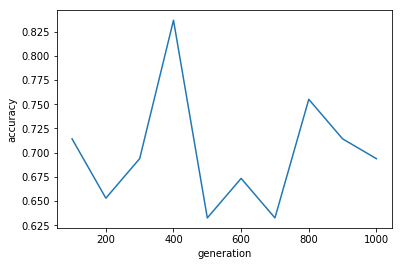

In [101]:
import matplotlib.pyplot as plt
plt.plot([100,200,300,400,500,600,700,800,900,1000],acc2)
plt.ylabel("accuracy")
plt.xlabel("generation")
plt.savefig("autsim.png")
plt.show()

In [103]:
a=linearSVM(data_input,data_output)

In [106]:
data_input=pd.read_csv('data2_input')
data_output=pd.read_csv("data2_ouput")['autism']

In [107]:
b=accuracy(a[0],a[4])

In [105]:
b

0.6938775510204082